In [3]:
from datetime import datetime

import numpy as np
import geopandas as gpd
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
sns.set_style('ticks')

# Data loading

## Planning

In [4]:
combined = pd.read_csv('./build-pipeline/combined.tsv', sep='\t', parse_dates=['Best Date'], infer_datetime_format=True)

In [5]:
c = combined[pd.notnull(combined.Location)]
#crs = {'init': 'epsg:4326'}
#gdf = gpd.GeoDataFrame(c, crs=crs, geometry=c.Location)

In [39]:
# # Only run this if you need to rebuild the combined tsv

# # Data source: http://sf-planning.org/pipeline-report
# dtypes = {
#     'BLKLOT': np.str,
#     'APN': np.str,
#     'Block Lot': np.str,
#     'block lot': np.str,
# }
# d17q4 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2017_Q4.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d17q3 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2017_Q3.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d17q2 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2017_Q2.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d17q1 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2017_Q1.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d16q4 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2016_Q4.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d16q3 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2016_Q3.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d16q2 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2016_Q2.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d16q1 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2016_Q1.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d15q4 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2015_Q4.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d15q3 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2015_Q3.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d15q2 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2015_Q2.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d15q1 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2015_Q1.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d14q4 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2014_Q4.tsv', delimiter="\t", dtype=dtypes, parse_dates=['BESTDATE'])
# d14q3 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2014_Q3.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])
# d14q2 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2014_Q2.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])
# d14q1 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2014_Q1.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])
# d13q4 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2013_Q4.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])
# d13q3 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2013_Q3.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])
# d13q2 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2013_Q2.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])
# d13q1 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2013_Q1.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])
# d12q4 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2012_Q4.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])
# d12q2 = pd.read_csv('build-pipeline/SF_Development_Pipeline_2012_Q2.tsv', delimiter="\t", dtype=dtypes, parse_dates=['Best Date'])

# # Combine all those files into a uniform dataframe

# self = lambda x: x

# def location(latlng):
#     if not latlng:
#         return None
#     if pd.isna(latlng):
#         return None
#     try:
#         if "\n" in latlng:
#             latlng = latlng.split("\n")[-1]
#         if "\t" in latlng:
#             latlng = latlng.split("\t")[-1]
#         ll = latlng.replace('(', '').replace(')', '').strip()
#         lat, lng = ll.split(",")
#         return Point(float(lng), float(lat))
#     except:
#         print("Got %s, (%s)" % (latlng, type(latlng)))
#         raise


# def location1(txt):
#     try:
#         return location(txt.split('\t')[-1])
#     except ValueError:
#         return None

    
# def location_addr(txt):
#     try:
#         if "\n" in txt:
#             return txt.split("\n")[0]
#     except:
#         print("bad location_addr: %s" % txt)
        

# id_field_map = {
#     'Project Type': {'PROJECT_TYPE': self},
#     'Blocklot': {
#         'BLKLOT': self,
#         'APN': lambda x: x.lower().replace('apn', '').strip(),
#         'Block Lot': self,
#         'block lot': self,
#     },
#     'Entitled': {
#         'Entitled': lambda x: x if isinstance(x, bool) else x.lower() == 'yes',
#         'EntitlementStatus': lambda x: x == '-1' or x == -1,
#     },
#     'Best Status': {
#         'BESTSTAT': lambda x: self(x).upper(),
#         'Best Stat': lambda x: self(x).upper(),
#     },
#     'Best Date': {
#         'BESTDATE': self,
#         'Best Date': self,
#     },
#     'Units': {
#         'UNITS': self,
#         'Units': self,
#     },
#     'Affordable units': {
#         'AFFORDABLE': self,
#     },
#     'Address': {
#         'NAMEADDR': self,
#         'Location 1': location_addr,
#     },
#     'Location': {
#         'Location': location,
#         'Location 1': location,
#     }
# }

# data = [d17q4, d17q3, d17q2, d17q1, d16q4, d16q3, d16q2, d16q1, d15q4, d15q3, d15q2, d15q1, d14q4, d14q3, d14q2, d14q1, d13q4, d13q3, d13q2, d13q1, d12q4, d12q2]
# data = data[::-1]

# df = pd.DataFrame(columns=id_field_map.keys())
# for idx, quarter in enumerate(data):
#     keys = {}
#     temp_df = pd.DataFrame(columns=id_field_map.keys())

#     for (key, transform) in id_field_map.iteritems():
#         for (field, transformer) in transform.iteritems():
#             if field in quarter:
#                 try:
#                     temp_df[key] = quarter[field].apply(transformer)
#                 except Exception as e:
#                     print(idx)
#                     raise
#                 keys[key] = field
#                 break
#     df = df.append(temp_df)

# combined2 = df
# #combined.to_csv("build-pipeline/combined.tsv", sep="\t")

In [172]:
# # Experimental year separation
# seen_by_year = {}
# for year in range(2012, 2018):
#     up_till = combined[combined['Best Date'] < datetime(year+1, 1, 1)]
#     seen_by_year[year] = set(up_till['Blocklot'].values)
# filed = combined[combined['Best Status'] == 'PL FILED']
# first_filings = pd.DataFrame(columns=filed.columns)
# for year in range(2013, 2019):
#     filed_in_year = filed[(filed['Best Date'] < datetime(year+1,1,1)) & (filed['Best Date'] > datetime(year,1,1)) & (~filed['Blocklot'].isin(seen_by_year[year-1]))]
#     print("Filed in %s: %s" % (year, len(filed_in_year)))
#     first_filings = first_filings.append(filed_in_year)

# Exploration

In [6]:
combined[combined['Blocklot'].isin(['0161001', '2880021', '6526030', '6597029', '3532005'])].sort_values(['Blocklot' ,'Best Date'])

,Unnamed: 0,Affordable units,Best Date,Best Status,Blocklot,Entitled,Location,Project Type,Units
22725,1361,NaN,2017-09-21,PL APPROVED,0161001,True,POINT (-122.4072418213 37.7974891663),Vacant,NaN
22473,1109,NaN,2017-09-20,PL APPROVED,2880021,True,POINT (-122.4630661011 37.7462120056),Vacant,NaN
10750,205,NaN,2015-07-14,PL FILED,3532005,NaN,POINT (-122.420399429 37.7693593026),Mixres,36.0
11970,236,NaN,2015-07-14,PL FILED,3532005,NaN,POINT (-122.42039943 37.7693593026),Mixres,36.0
13416,388,NaN,2015-07-14,PL FILED,3532005,NaN,NaN,Mixres,36.0
14675,348,NaN,2015-07-14,PL FILED,3532005,NaN,POINT (-122.42039943 37.7693593026),NaN,36.0
15935,286,NaN,2015-07-14,PL FILED,3532005,NaN,POINT (-122.42039943 37.7693593035),Mixres,36.0
17351,311,NaN,2015-07-14,PL FILED,3532005,NaN,POINT (-122.42039943 37.7693593035),Mixres,36.0
18712,275,NaN,2015-07-14,PL FILED,3532005,NaN,POINT (-122.420399429 37.7693593026),Mixres,36.0
20070,191,NaN,2017-07-13,PL APPROVED,3532005,True,POINT (-122.4204025269 37.7693595886),Mixres,36.0


In [20]:
combined[combined['Units'] >  0]['Project Type'].unique()

array([nan, 'Mixres', 'Resident', 'Visitor', 'MIPS', 'CIE', 'Retail/Ent'],
      dtype=object)

In [35]:
mask = (combined['Units'] > 0) & (combined['Affordable units'] > 0)
combined['ratio'] = combined[mask]['Affordable units'] / combined[mask]['Units']

In [47]:
combined[combined['ratio'] > 0]

KeyError: 'ratio'

In [79]:
# Problem here is that a permit is submitted long before it spells out how many units/affordable units
# it will build. So I have to get the first date and then find the latest unit count to do this correctly

f = combined[
    (combined['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined['Project Type'].isin(['Mixres', 'Resident', "Vacant"]))
]
ff = first_filings(f, min_year=2012, max_year=2018, datefield='Best Date', unitfield='Units')
ff = ff[ff['Best Date'] < datetime(2017,10,1)]

def bucket(ratio):
    if ratio < .01:
        return "0"
    if ratio < .13:
        return "12"
    if ratio < .19:
        return "18"
    if ratio < .20:
        return "19"
    return "25"

ff['bucket'] = ff['ratio'].apply(bucket)

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
with sns.color_palette(colors):
    f = mp.pyplot.figure()
    ax = f.gca()
    df = ff[ff['Best Status'] == 'PL FILED']
    df = df.groupby(['_quarter', 'bucket']).aggregate({'Affordable units': 'sum'}).unstack()
    df.columns = df.columns.droplevel(0)
    p = df.plot.bar(ax=ax, stacked=True)
    mp.pyplot.title('Number of Affordable residential permits, by IZ%, over time')
    ax.set_ylabel("# Units")
    ax.set_xlabel("Filing year")
    ax.legend(loc='upper left')
    f.set_size_inches(8, 6)
    f.set_dpi(300)
sns.despine()
f.savefig("figs/permits-by-type-iz.png", dpi=300, bbox_inches='tight')

KeyError: 'ratio'

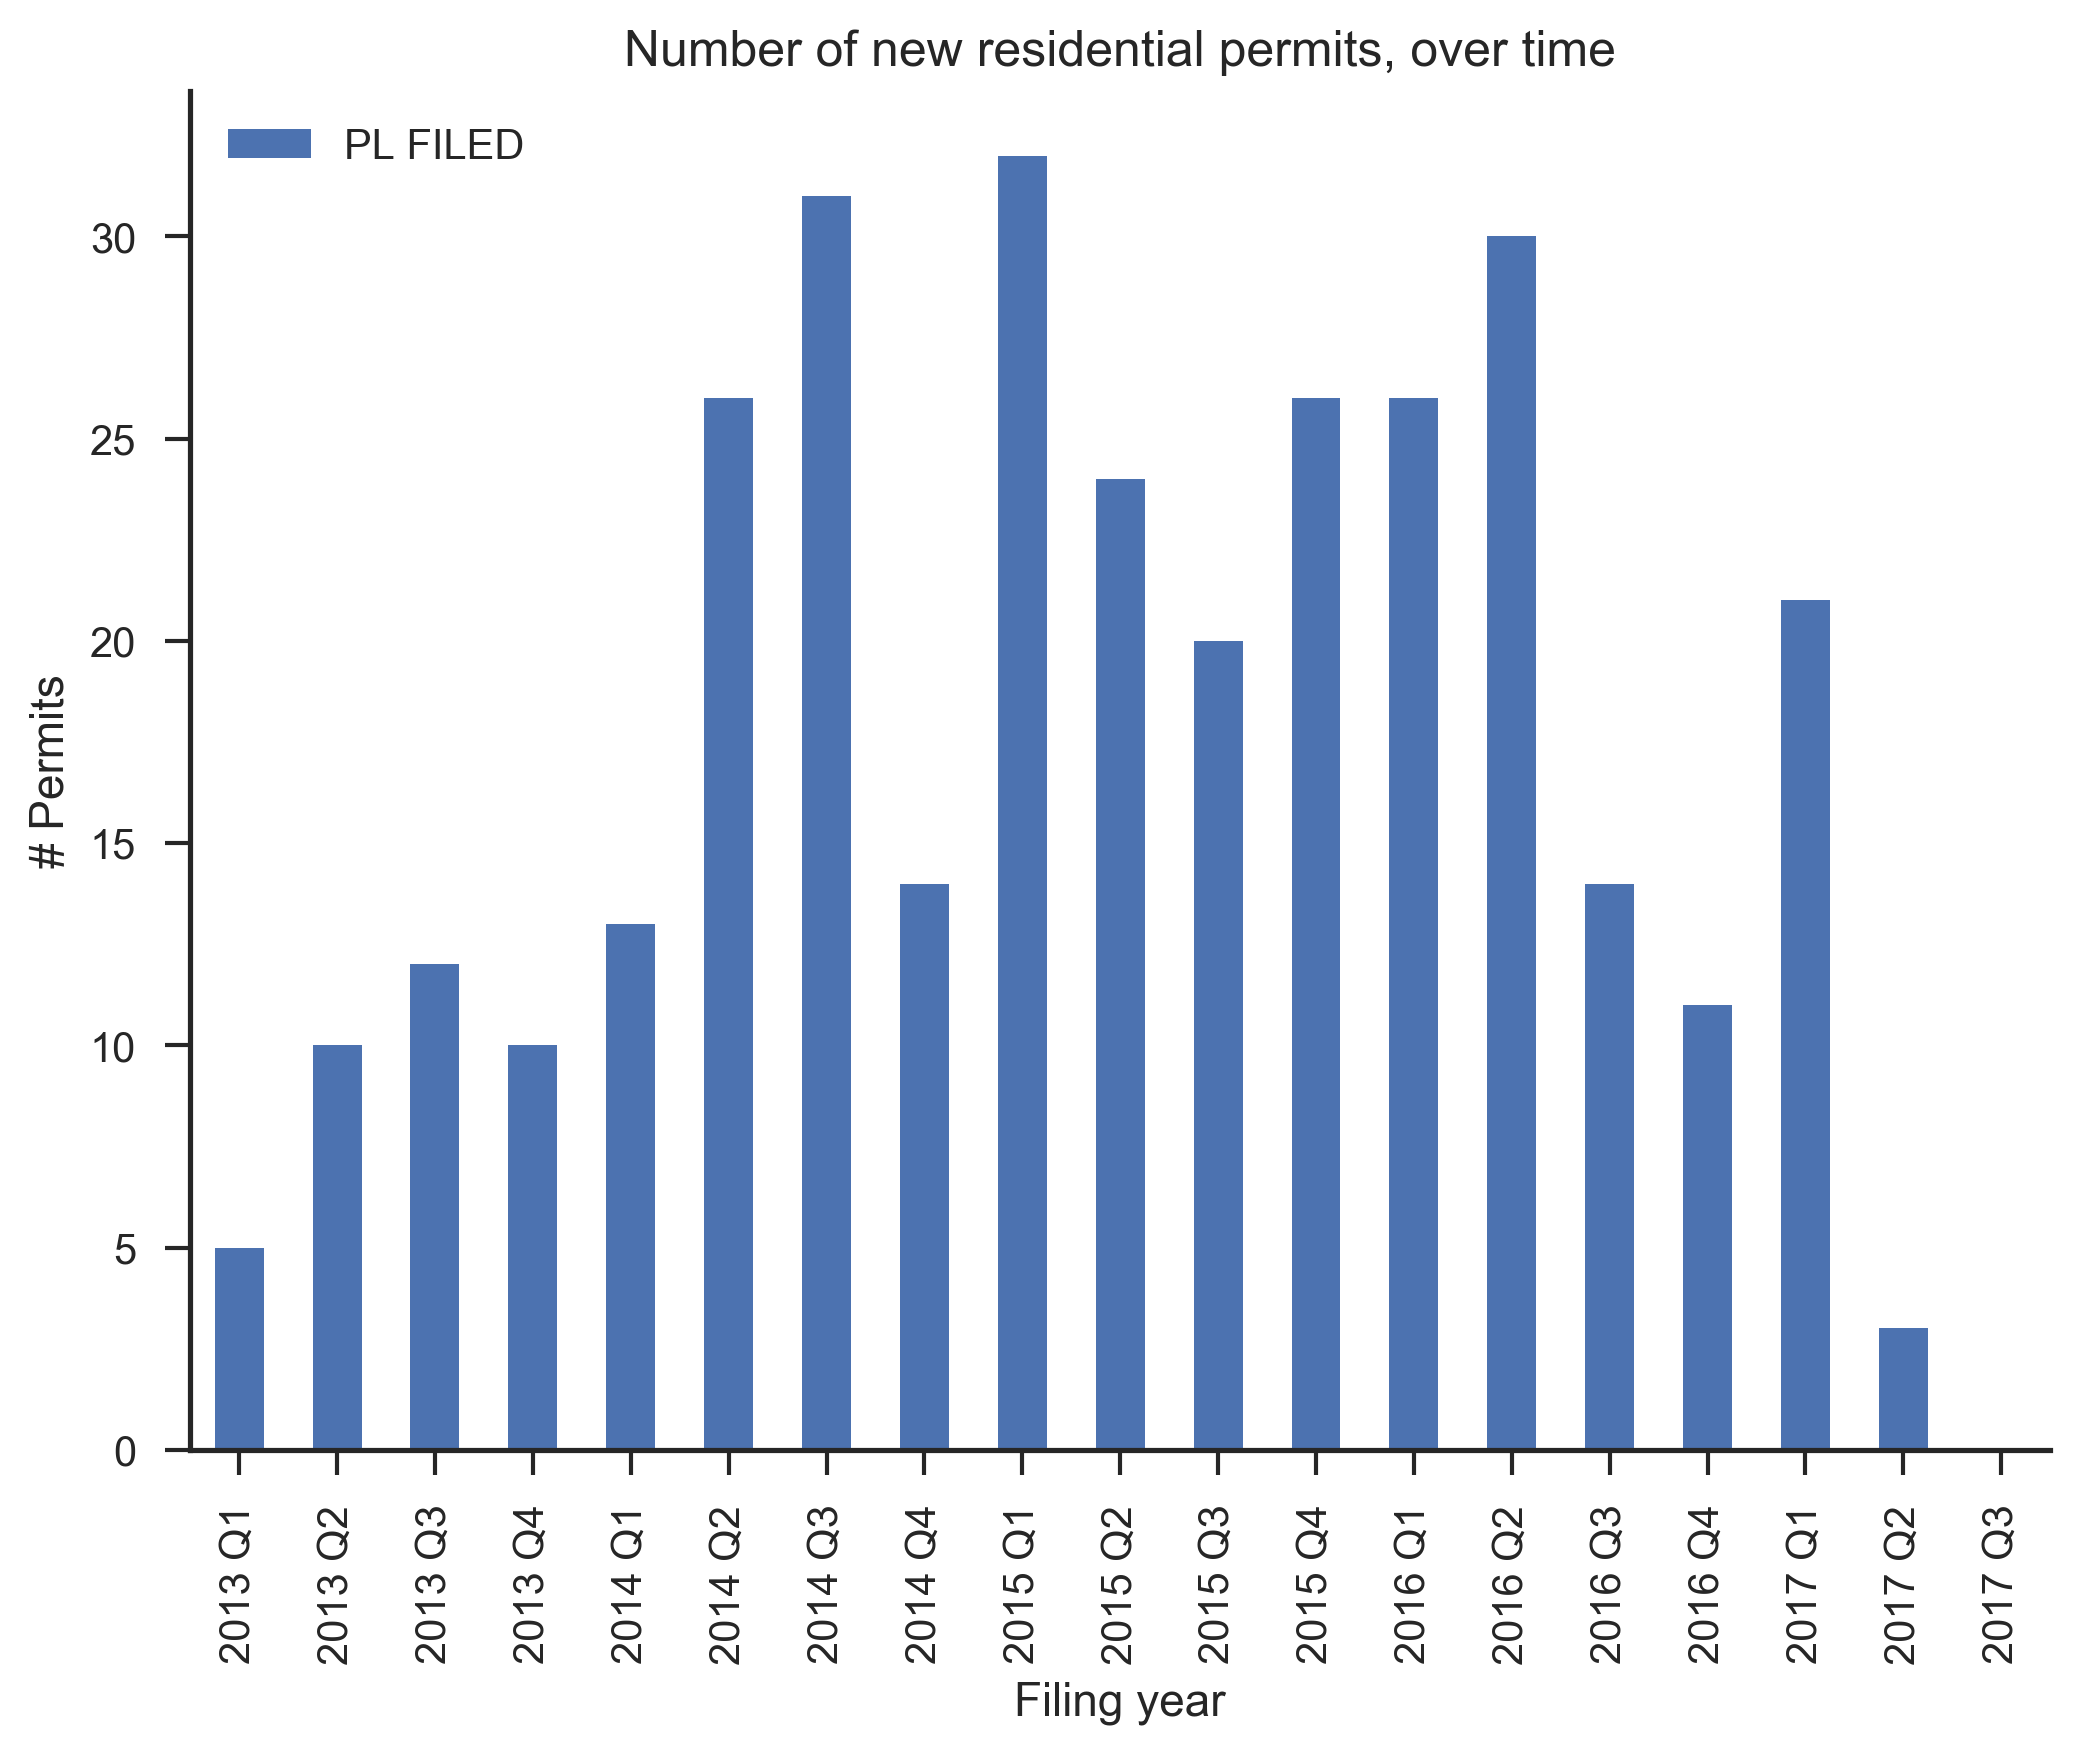

In [87]:
f = combined[
    (combined['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined['Project Type'].isin(['Mixres', 'Resident', "Vacant"]))
]
ff = first_filings(f, min_year=2012, max_year=2018, datefield='Best Date', unitfield='Units')
ff = ff[ff['Best Date'] < datetime(2017,10,1)]

#colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
#with sns.color_palette(colors):
f = mp.pyplot.figure()
ax = f.gca()
df = ff[ff['Best Status'] == 'PL FILED']
df = df.groupby(['_quarter', 'Best Status']).aggregate({'Best Status': 'count'}).unstack()
for qq in range(1,5):
    for yy in range(2013, 2018):
        idx = "%s Q%s" % (yy, qq)
        try:
            df.loc[idx]
        except KeyError:
            # This means the quarter is missing, therefore 0
            if qq == 4 and year == 2017:
                # We don't have 2017 Q4 year
                break
            df.loc[idx] = 0
df.columns = df.columns.droplevel(0)
p = df.plot.bar(ax=ax) # , stacked=True)
mp.pyplot.title('Number of new residential permits, over time')
ax.set_ylabel("# Permits")
ax.set_xlabel("Filing year")
ax.legend(loc='upper left')
f.set_size_inches(8, 6)
f.set_dpi(300)
sns.despine()
f.savefig("figs/permits-filed-new.png", dpi=300, bbox_inches='tight')

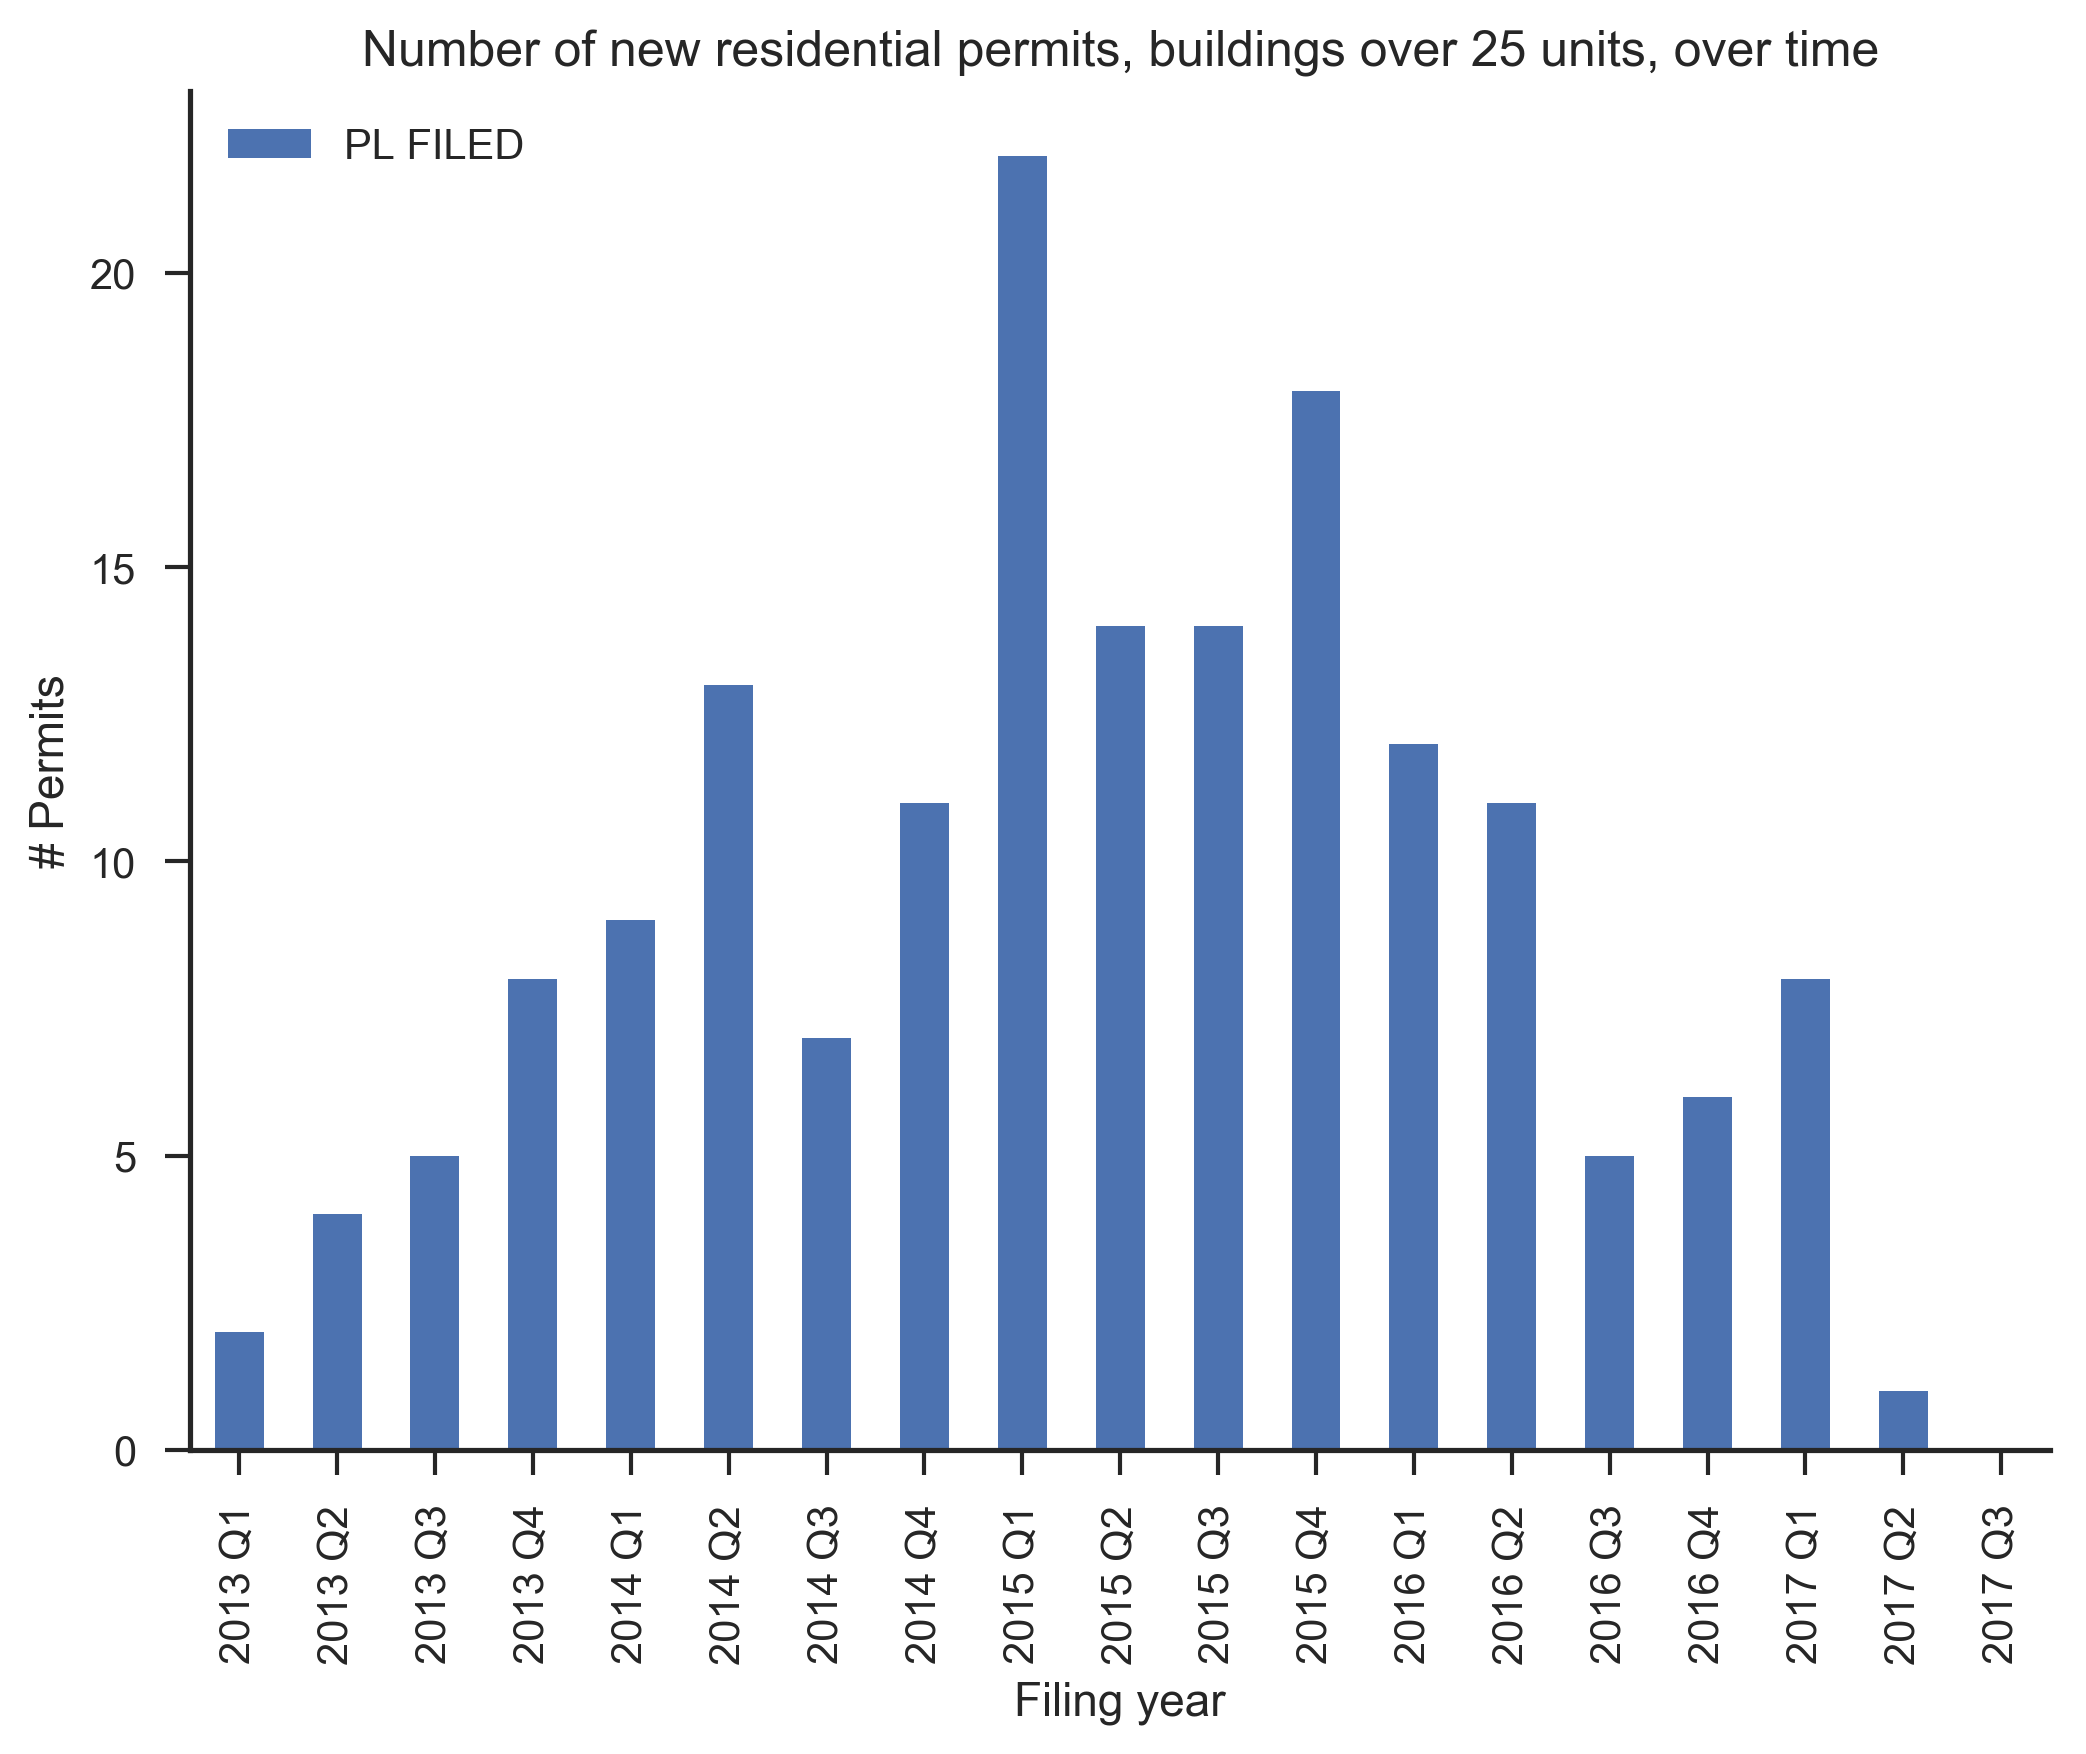

In [90]:
f = combined[
    (combined['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined['Project Type'].isin(['Mixres', 'Resident', "Vacant"]))
]
ff = first_filings(f, min_year=2012, max_year=2018, datefield='Best Date', unitfield='Units')
ff = ff[ff['Best Date'] < datetime(2017,10,1)]

#colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
#with sns.color_palette(colors):
f = mp.pyplot.figure()
ax = f.gca()
df = ff[ff['Best Status'] == 'PL FILED']
df = df[df['Units'] >= 25]
df = df.groupby(['_quarter', 'Best Status']).aggregate({'Best Status': 'count'}).unstack()
for qq in range(1,5):
    for yy in range(2013, 2018):
        idx = "%s Q%s" % (yy, qq)
        try:
            df.loc[idx]
        except KeyError:
            # This means the quarter is missing, therefore 0
            if qq == 4 and year == 2017:
                # We don't have 2017 Q4 year
                break
            df.loc[idx] = 0
df.columns = df.columns.droplevel(0)
p = df.plot.bar(ax=ax) # , stacked=True)
mp.pyplot.title('Number of new residential permits, buildings over 25 units, over time')
ax.set_ylabel("# Permits")
ax.set_xlabel("Filing year")
ax.legend(loc='upper left')
f.set_size_inches(8, 6)
f.set_dpi(300)
sns.despine()
f.savefig("figs/permits-large-buildings-filed-new.png", dpi=300, bbox_inches='tight')

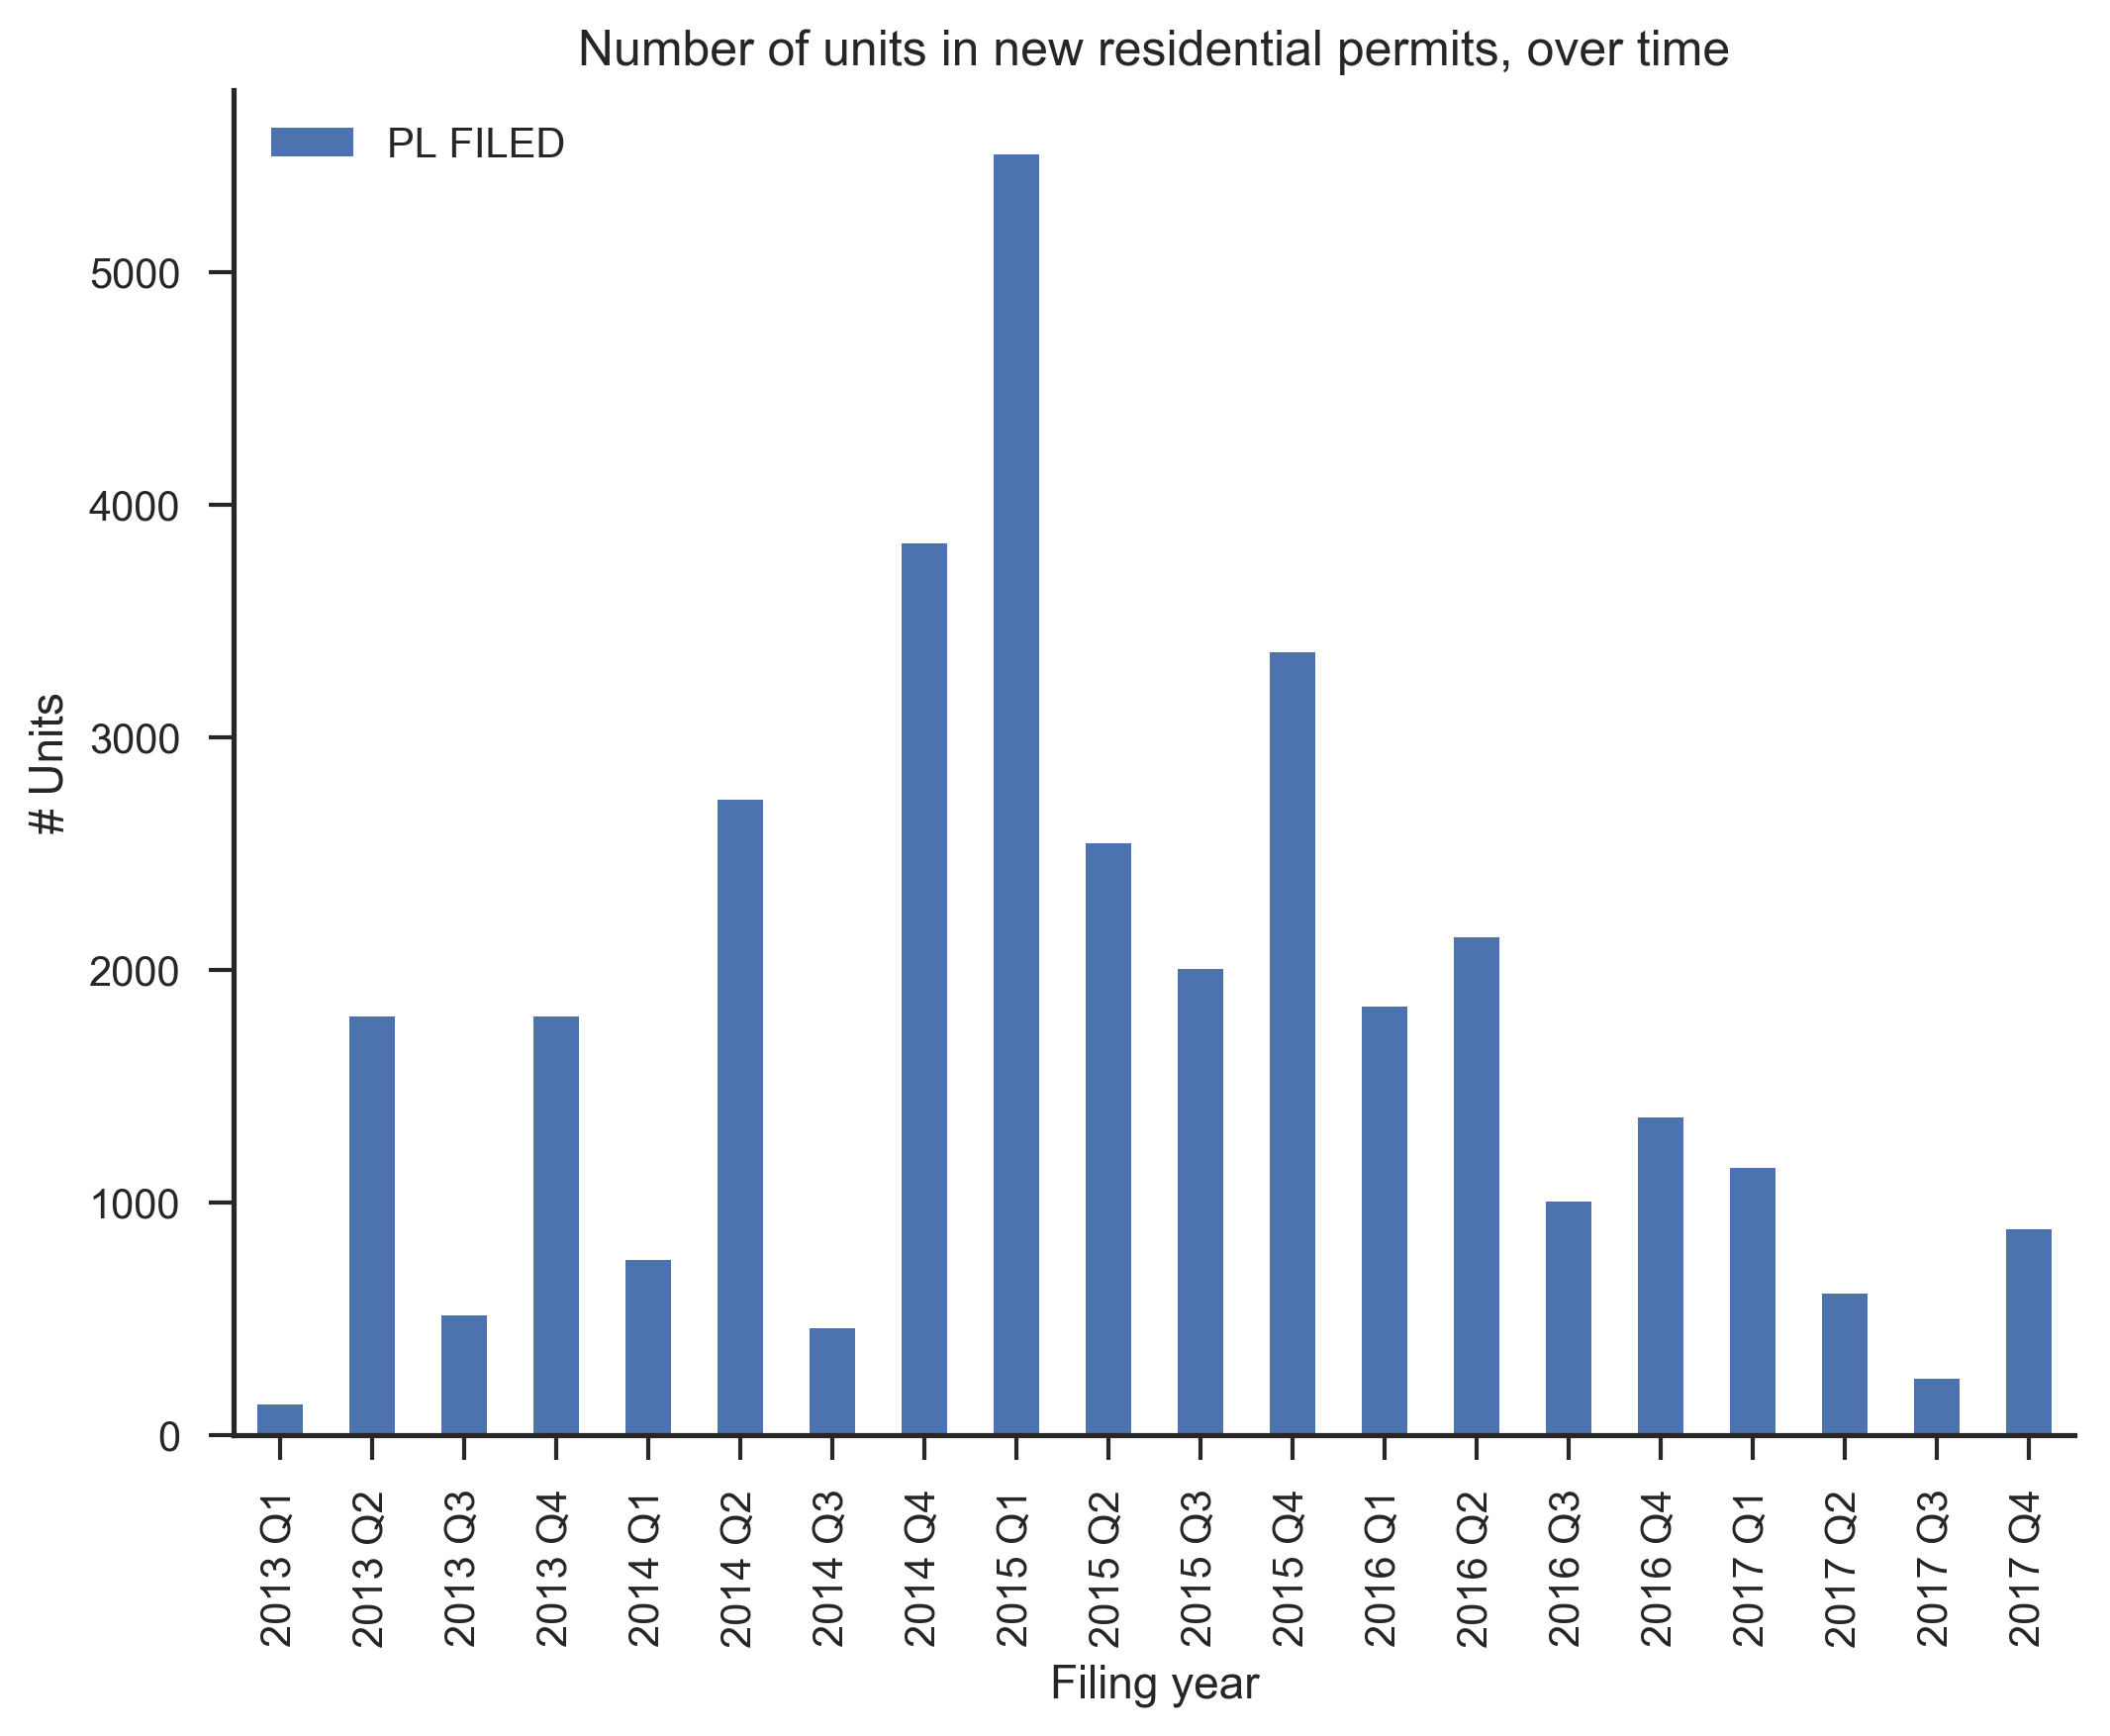

In [59]:
f = combined2[
    (combined2['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined2['Project Type'].isin(['Mixres', 'Resident', "Vacant"]))
]
ff = first_filings(f, min_year=2012, max_year=2018, datefield='Best Date', unitfield='Units')

#colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
#with sns.color_palette(colors):
f = mp.pyplot.figure()
ax = f.gca()
df = ff[ff['Best Status'] == 'PL FILED']
df = df.groupby(['_quarter', 'Best Status']).aggregate({'Units': 'sum'}).unstack()
df.columns = df.columns.droplevel(0)
p = df.plot.bar(ax=ax, stacked=True)
mp.pyplot.title('Number of units in new residential permits, over time')
ax.set_ylabel("# Units")
ax.set_xlabel("Filing year")
ax.legend(loc='upper left')
f.set_size_inches(8, 6)
f.set_dpi(300)
sns.despine()
f.savefig("figs/permits-units-filed-2017q4.png", dpi=300, bbox_inches='tight')

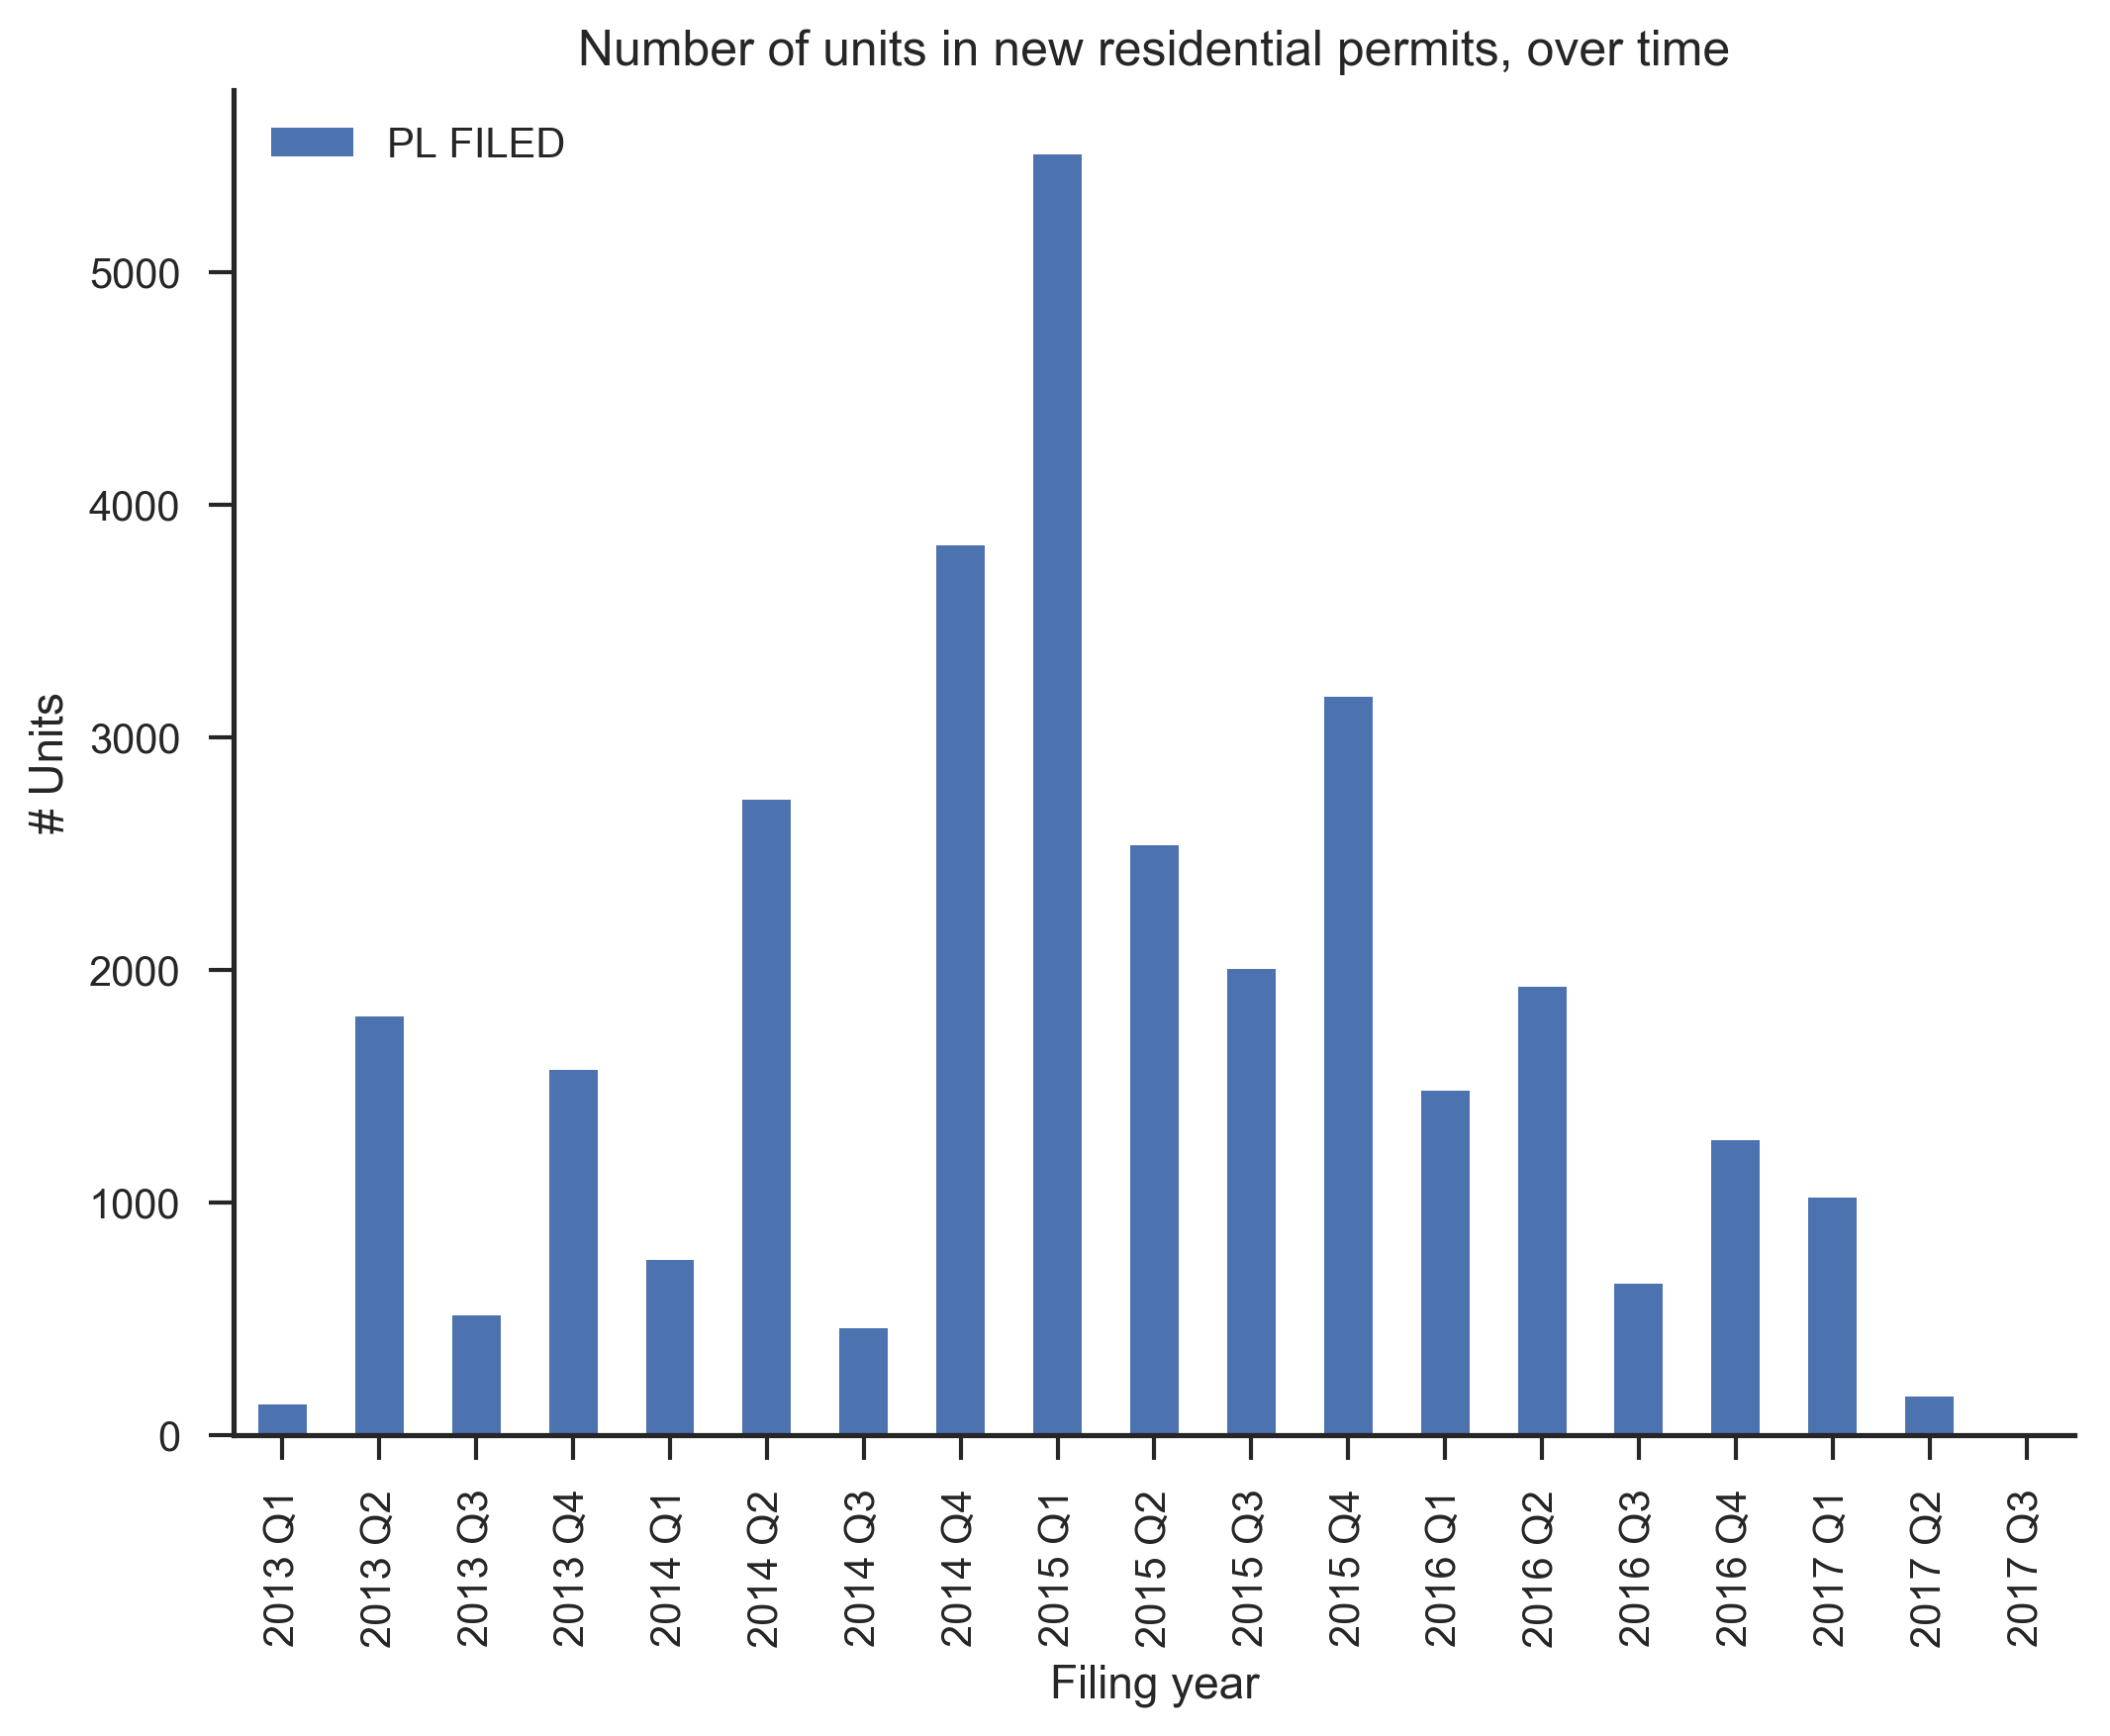

In [89]:
f = combined[
    (combined['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined['Project Type'].isin(['Mixres', 'Resident', "Vacant"]))
]
ff = first_filings(f, min_year=2012, max_year=2018, datefield='Best Date', unitfield='Units')
ff = ff[ff['Best Date'] < datetime(2017,10,1)]

#colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
#with sns.color_palette(colors):
f = mp.pyplot.figure()
ax = f.gca()
df = ff[ff['Best Status'] == 'PL FILED']
df = df.groupby(['_quarter', 'Best Status']).aggregate({'Units': 'sum'}).unstack()
for qq in range(1,5):
    for yy in range(2013, 2018):
        idx = "%s Q%s" % (yy, qq)
        try:
            df.loc[idx]
        except KeyError:
            # This means the quarter is missing, therefore 0
            if qq == 4 and year == 2017:
                # We don't have 2017 Q4 year
                break
            df.loc[idx] = 0
df.columns = df.columns.droplevel(0)
p = df.plot.bar(ax=ax, stacked=True)
mp.pyplot.title('Number of units in new residential permits, over time')
ax.set_ylabel("# Units")
ax.set_xlabel("Filing year")
ax.legend(loc='upper left')
f.set_size_inches(8, 6)
f.set_dpi(300)
sns.despine()
f.savefig("figs/permits-units-filed-new.png", dpi=300, bbox_inches='tight')

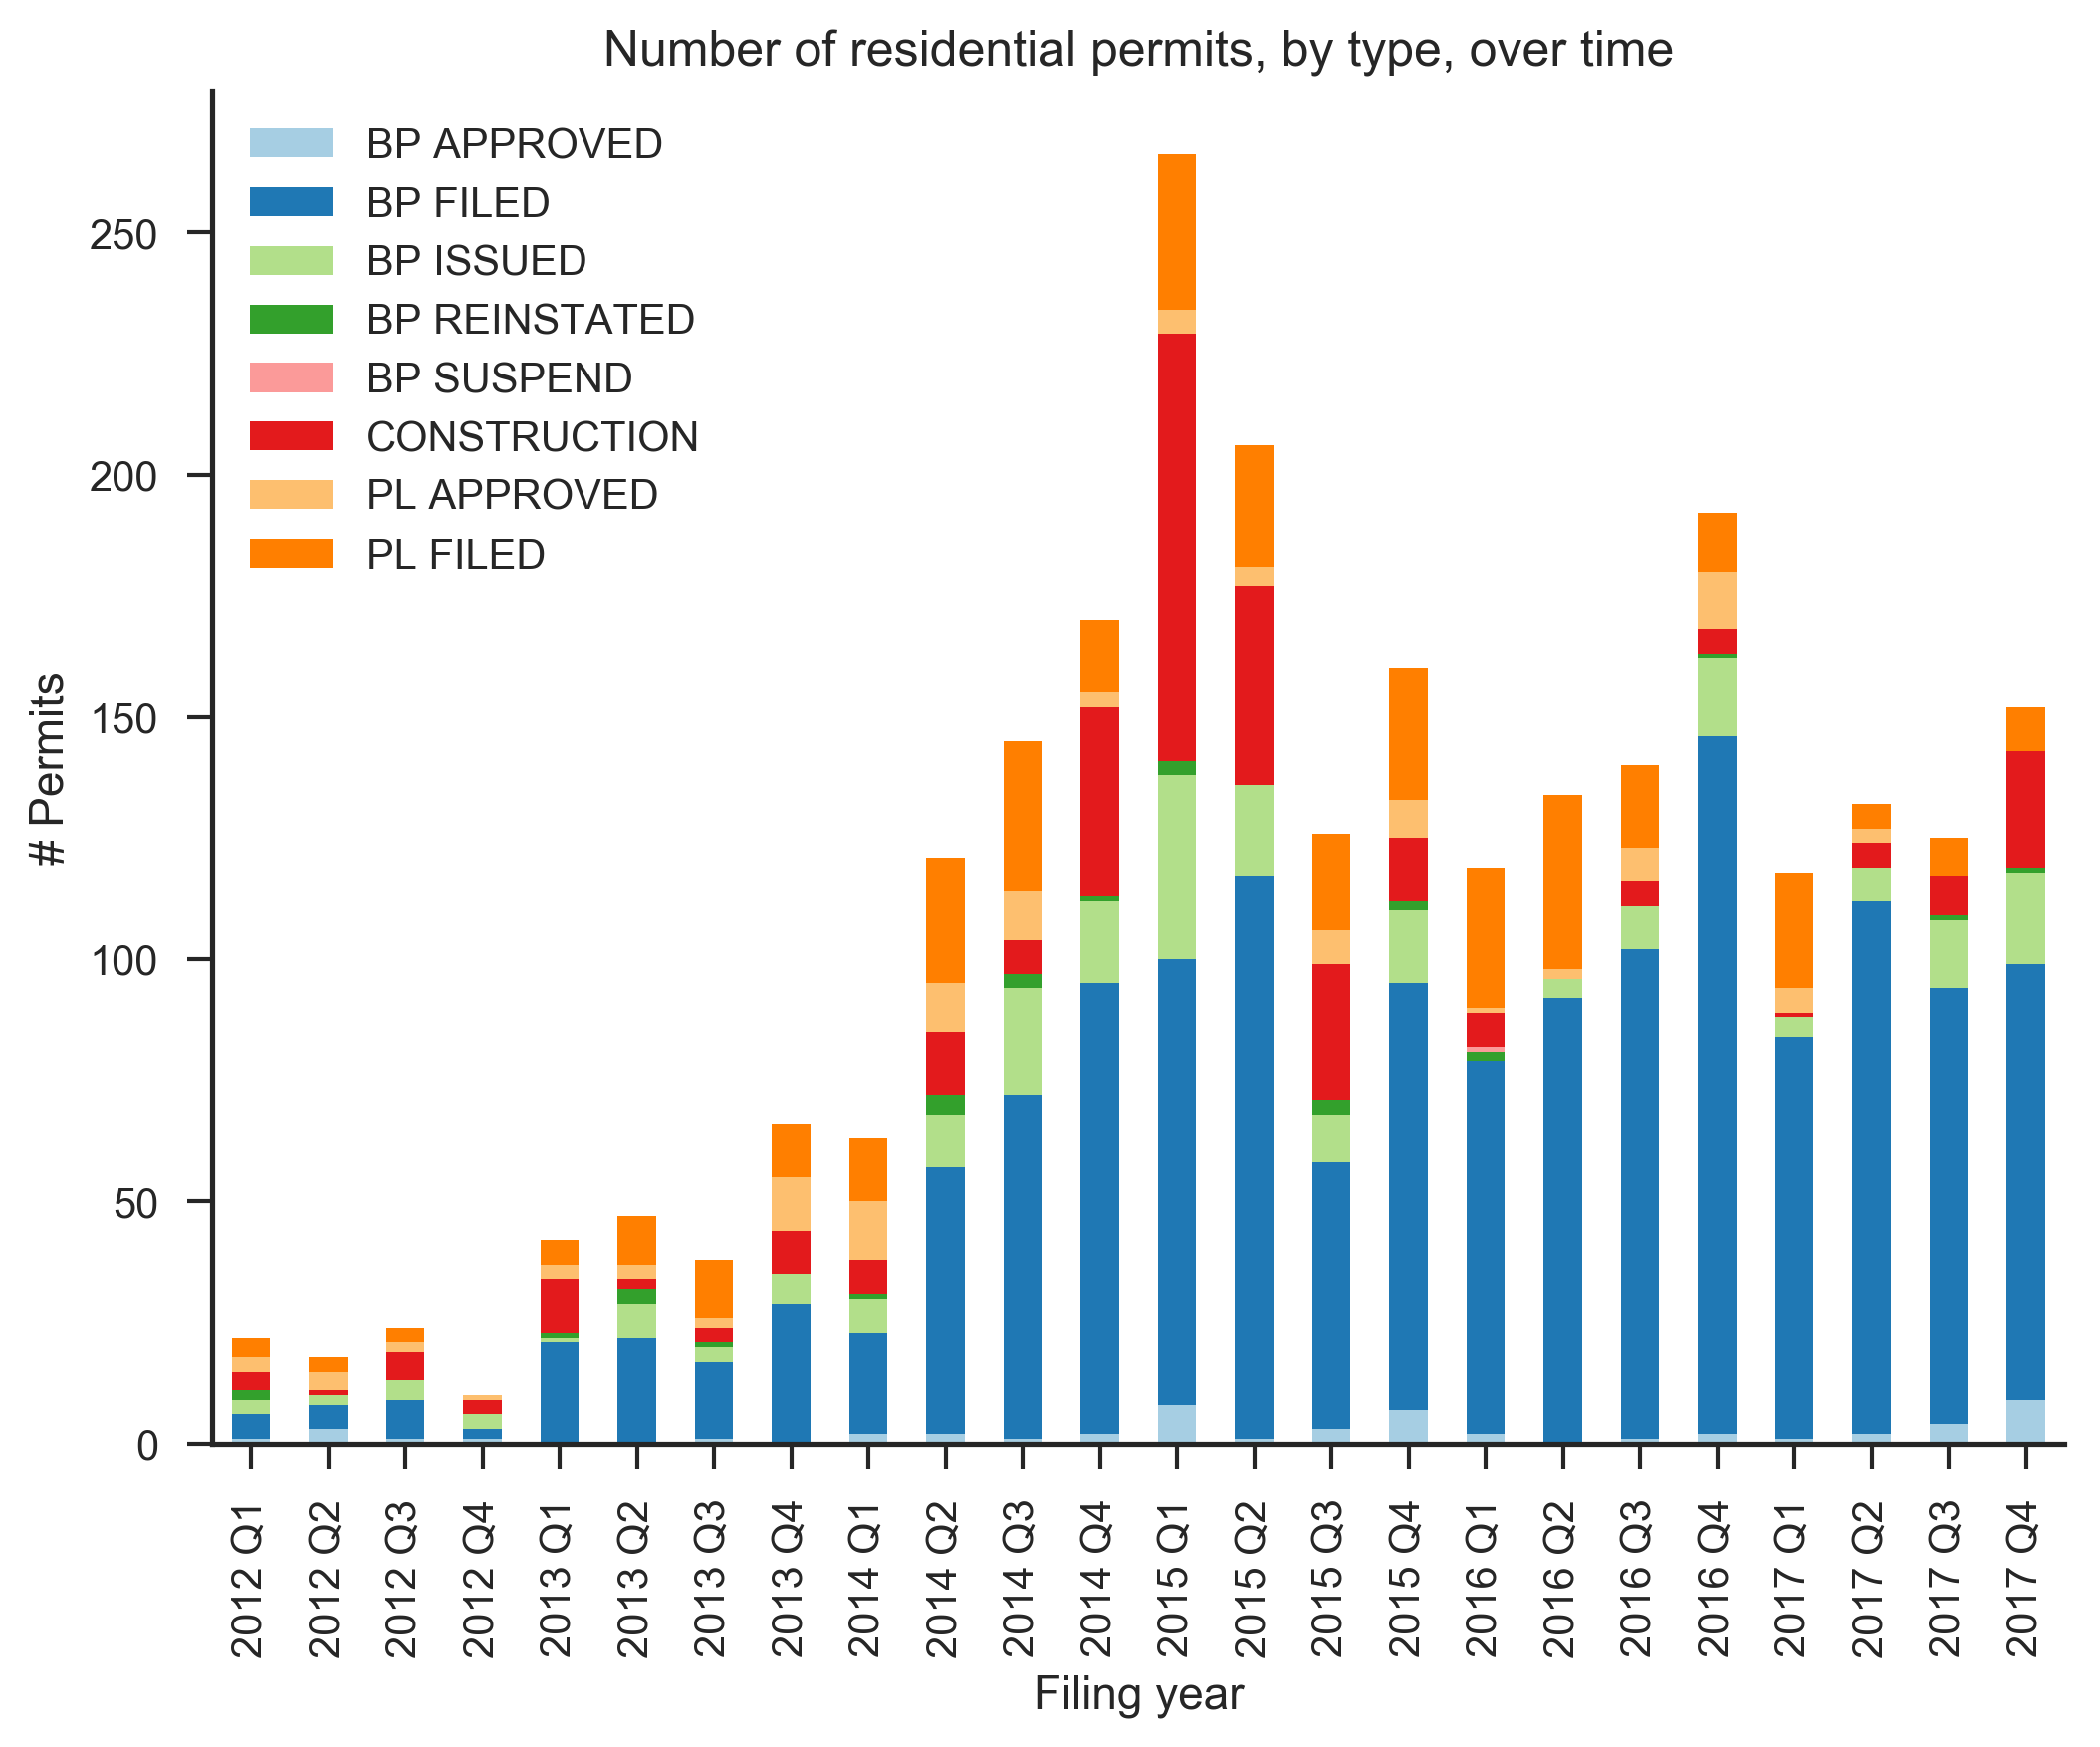

In [60]:
f = combined2[
    (combined2['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined2['Project Type'].isin(['Mixres', 'Resident', "Vacant"]))
]
ff = first_filings(f, min_year=2011, max_year=2018, datefield='Best Date', unitfield='Units')
#ff = ff[ff['Best Date'] < datetime(2017,10,1)]

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
with sns.color_palette(colors):
    f = mp.pyplot.figure()
    ax = f.gca()
    df = ff.groupby(['_quarter', 'Best Status']).aggregate({'Best Status': 'count'}).unstack()
    df.columns = df.columns.droplevel(0)
    p = df.plot.bar(ax=ax, stacked=True)
    mp.pyplot.title('Number of residential permits, by type, over time')
    ax.set_ylabel("# Permits")
    ax.set_xlabel("Filing year")
    ax.legend(loc='upper left')
    f.set_size_inches(8, 6)
    f.set_dpi(300)
sns.despine()
f.savefig("figs/permits-by-type-2017q4.png", dpi=300, bbox_inches='tight')

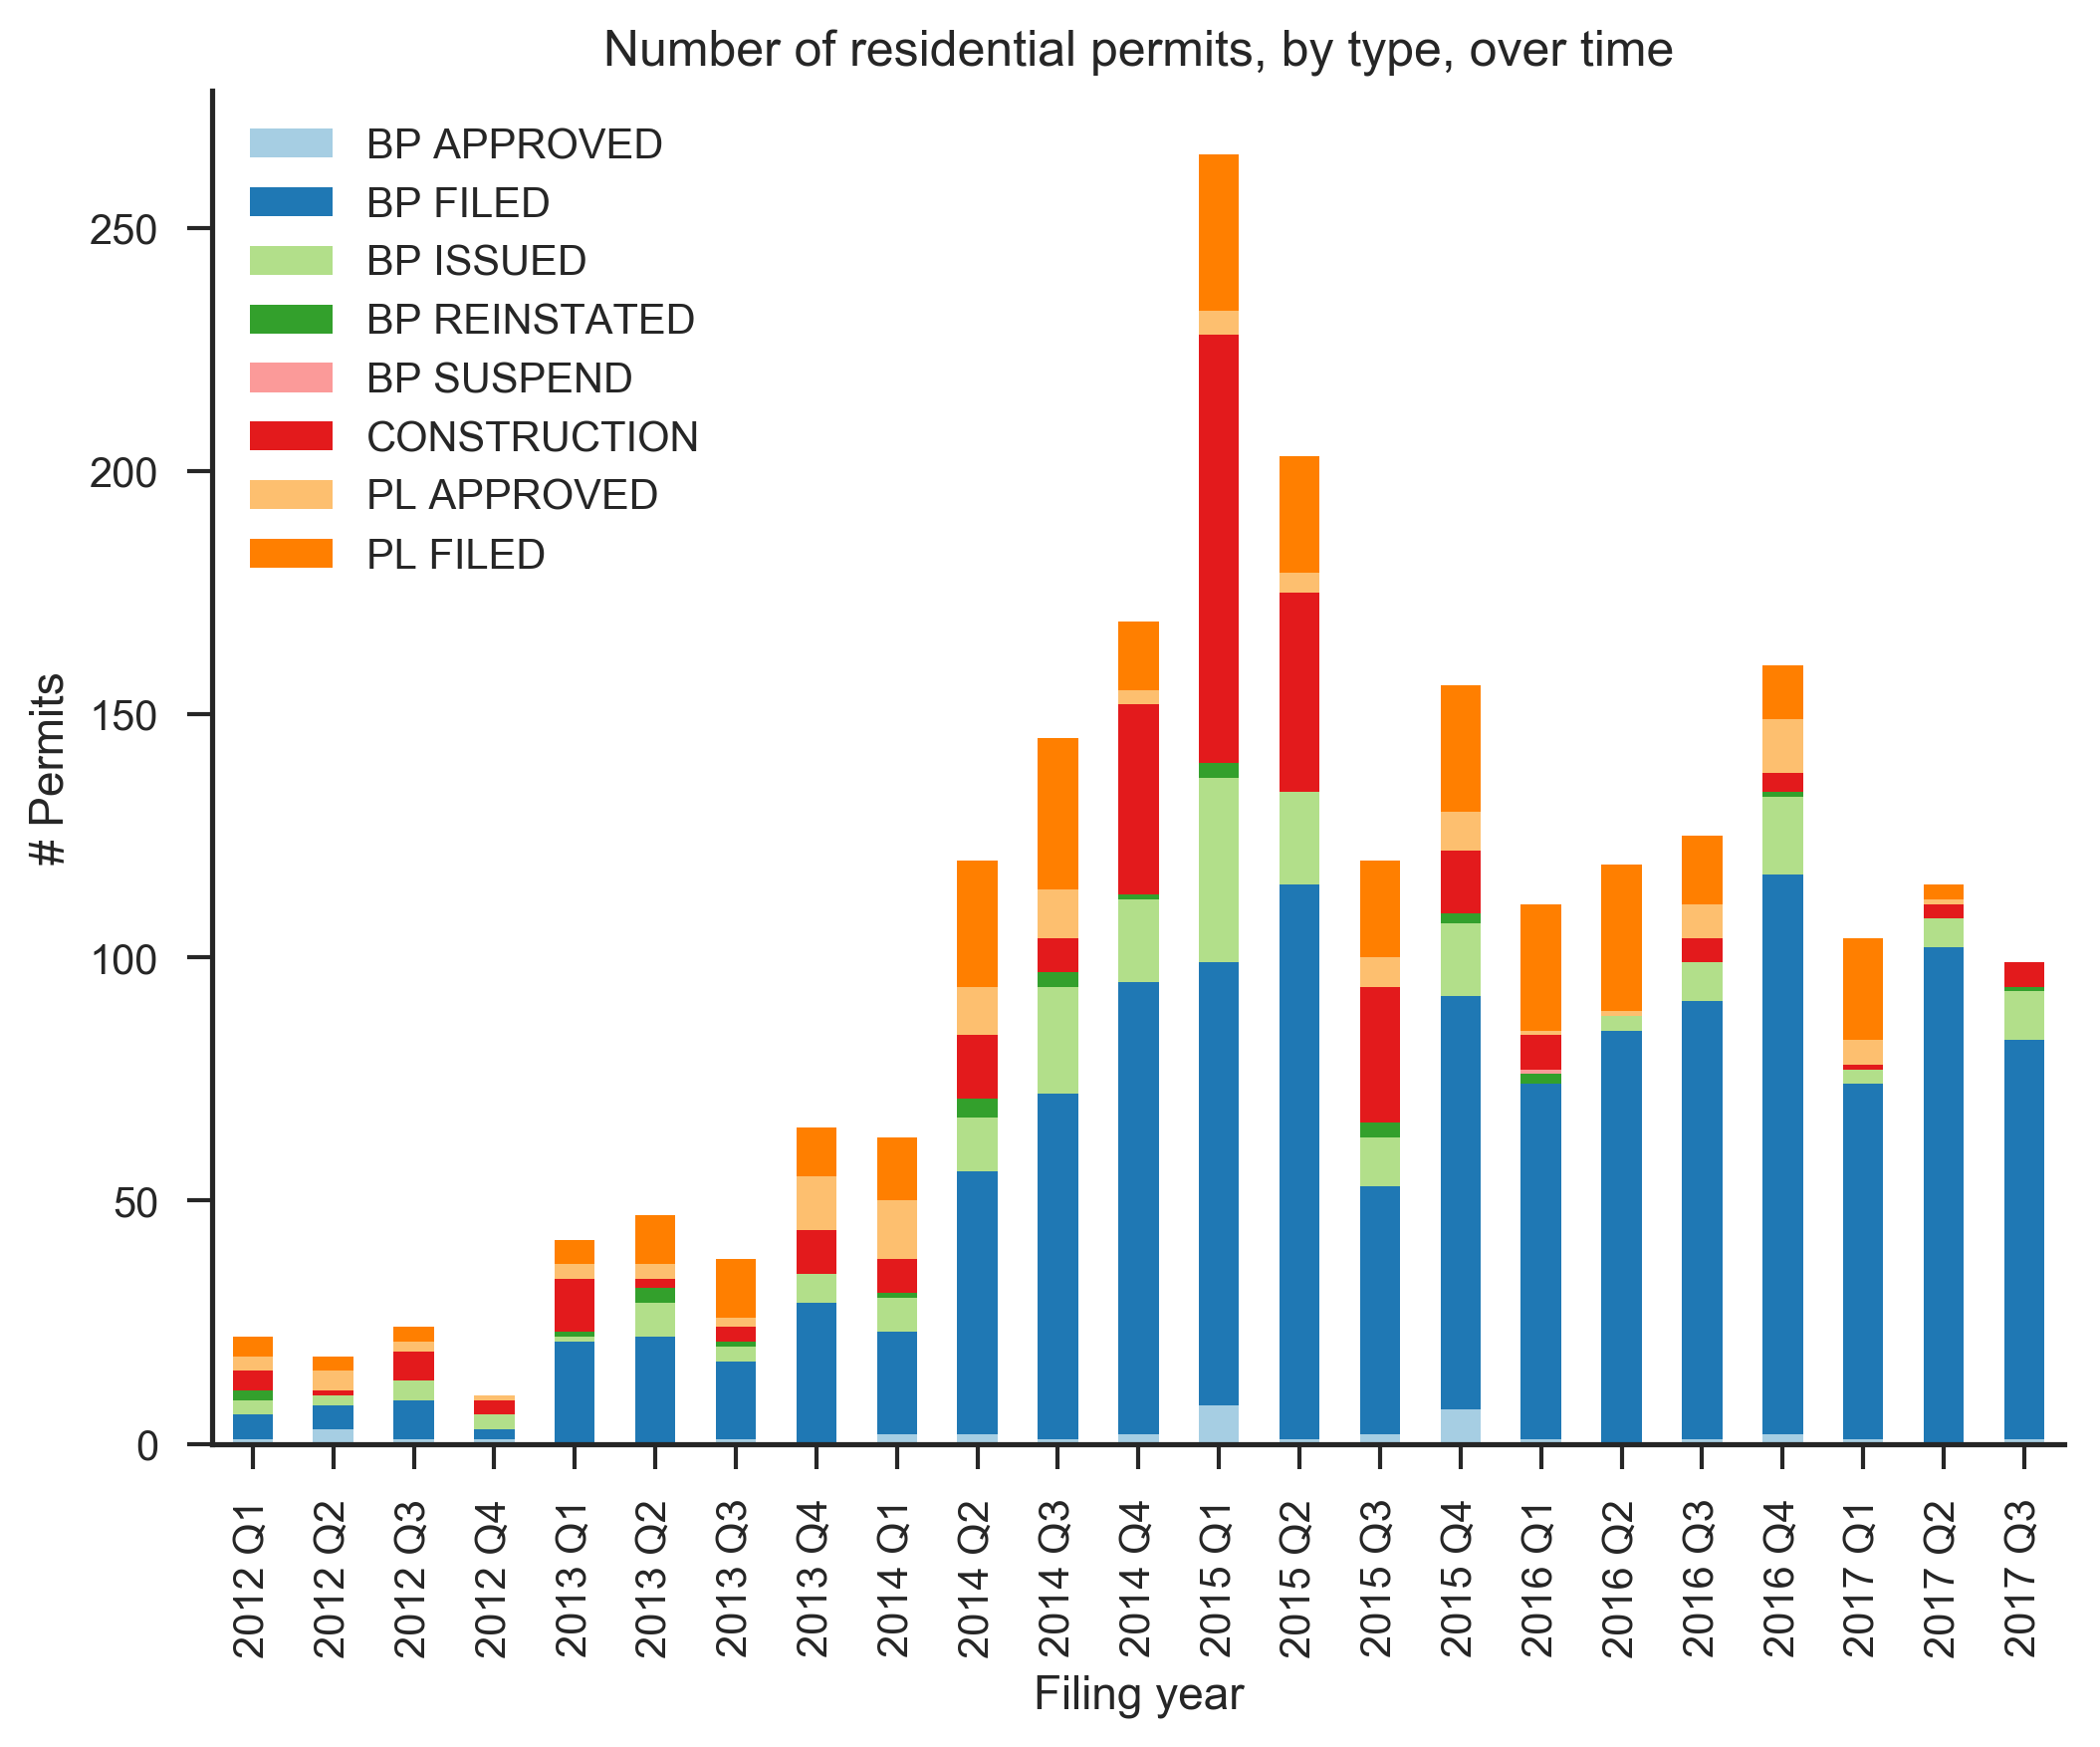

In [85]:
f = combined[
    (combined['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined['Project Type'].isin(['Mixres', 'Resident', "Vacant"]))
]
ff = first_filings(f, min_year=2011, max_year=2018, datefield='Best Date', unitfield='Units')
ff = ff[ff['Best Date'] < datetime(2017,10,1)]

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
with sns.color_palette(colors):
    f = mp.pyplot.figure()
    ax = f.gca()
    df = ff.groupby(['_quarter', 'Best Status']).aggregate({'Best Status': 'count'}).unstack()
    df.columns = df.columns.droplevel(0)
    p = df.plot.bar(ax=ax, stacked=True)
    mp.pyplot.title('Number of residential permits, by type, over time')
    ax.set_ylabel("# Permits")
    ax.set_xlabel("Filing year")
    ax.legend(loc='upper left')
    f.set_size_inches(8, 6)
    f.set_dpi(300)
sns.despine()
f.savefig("figs/permits-by-type.png", dpi=300, bbox_inches='tight')

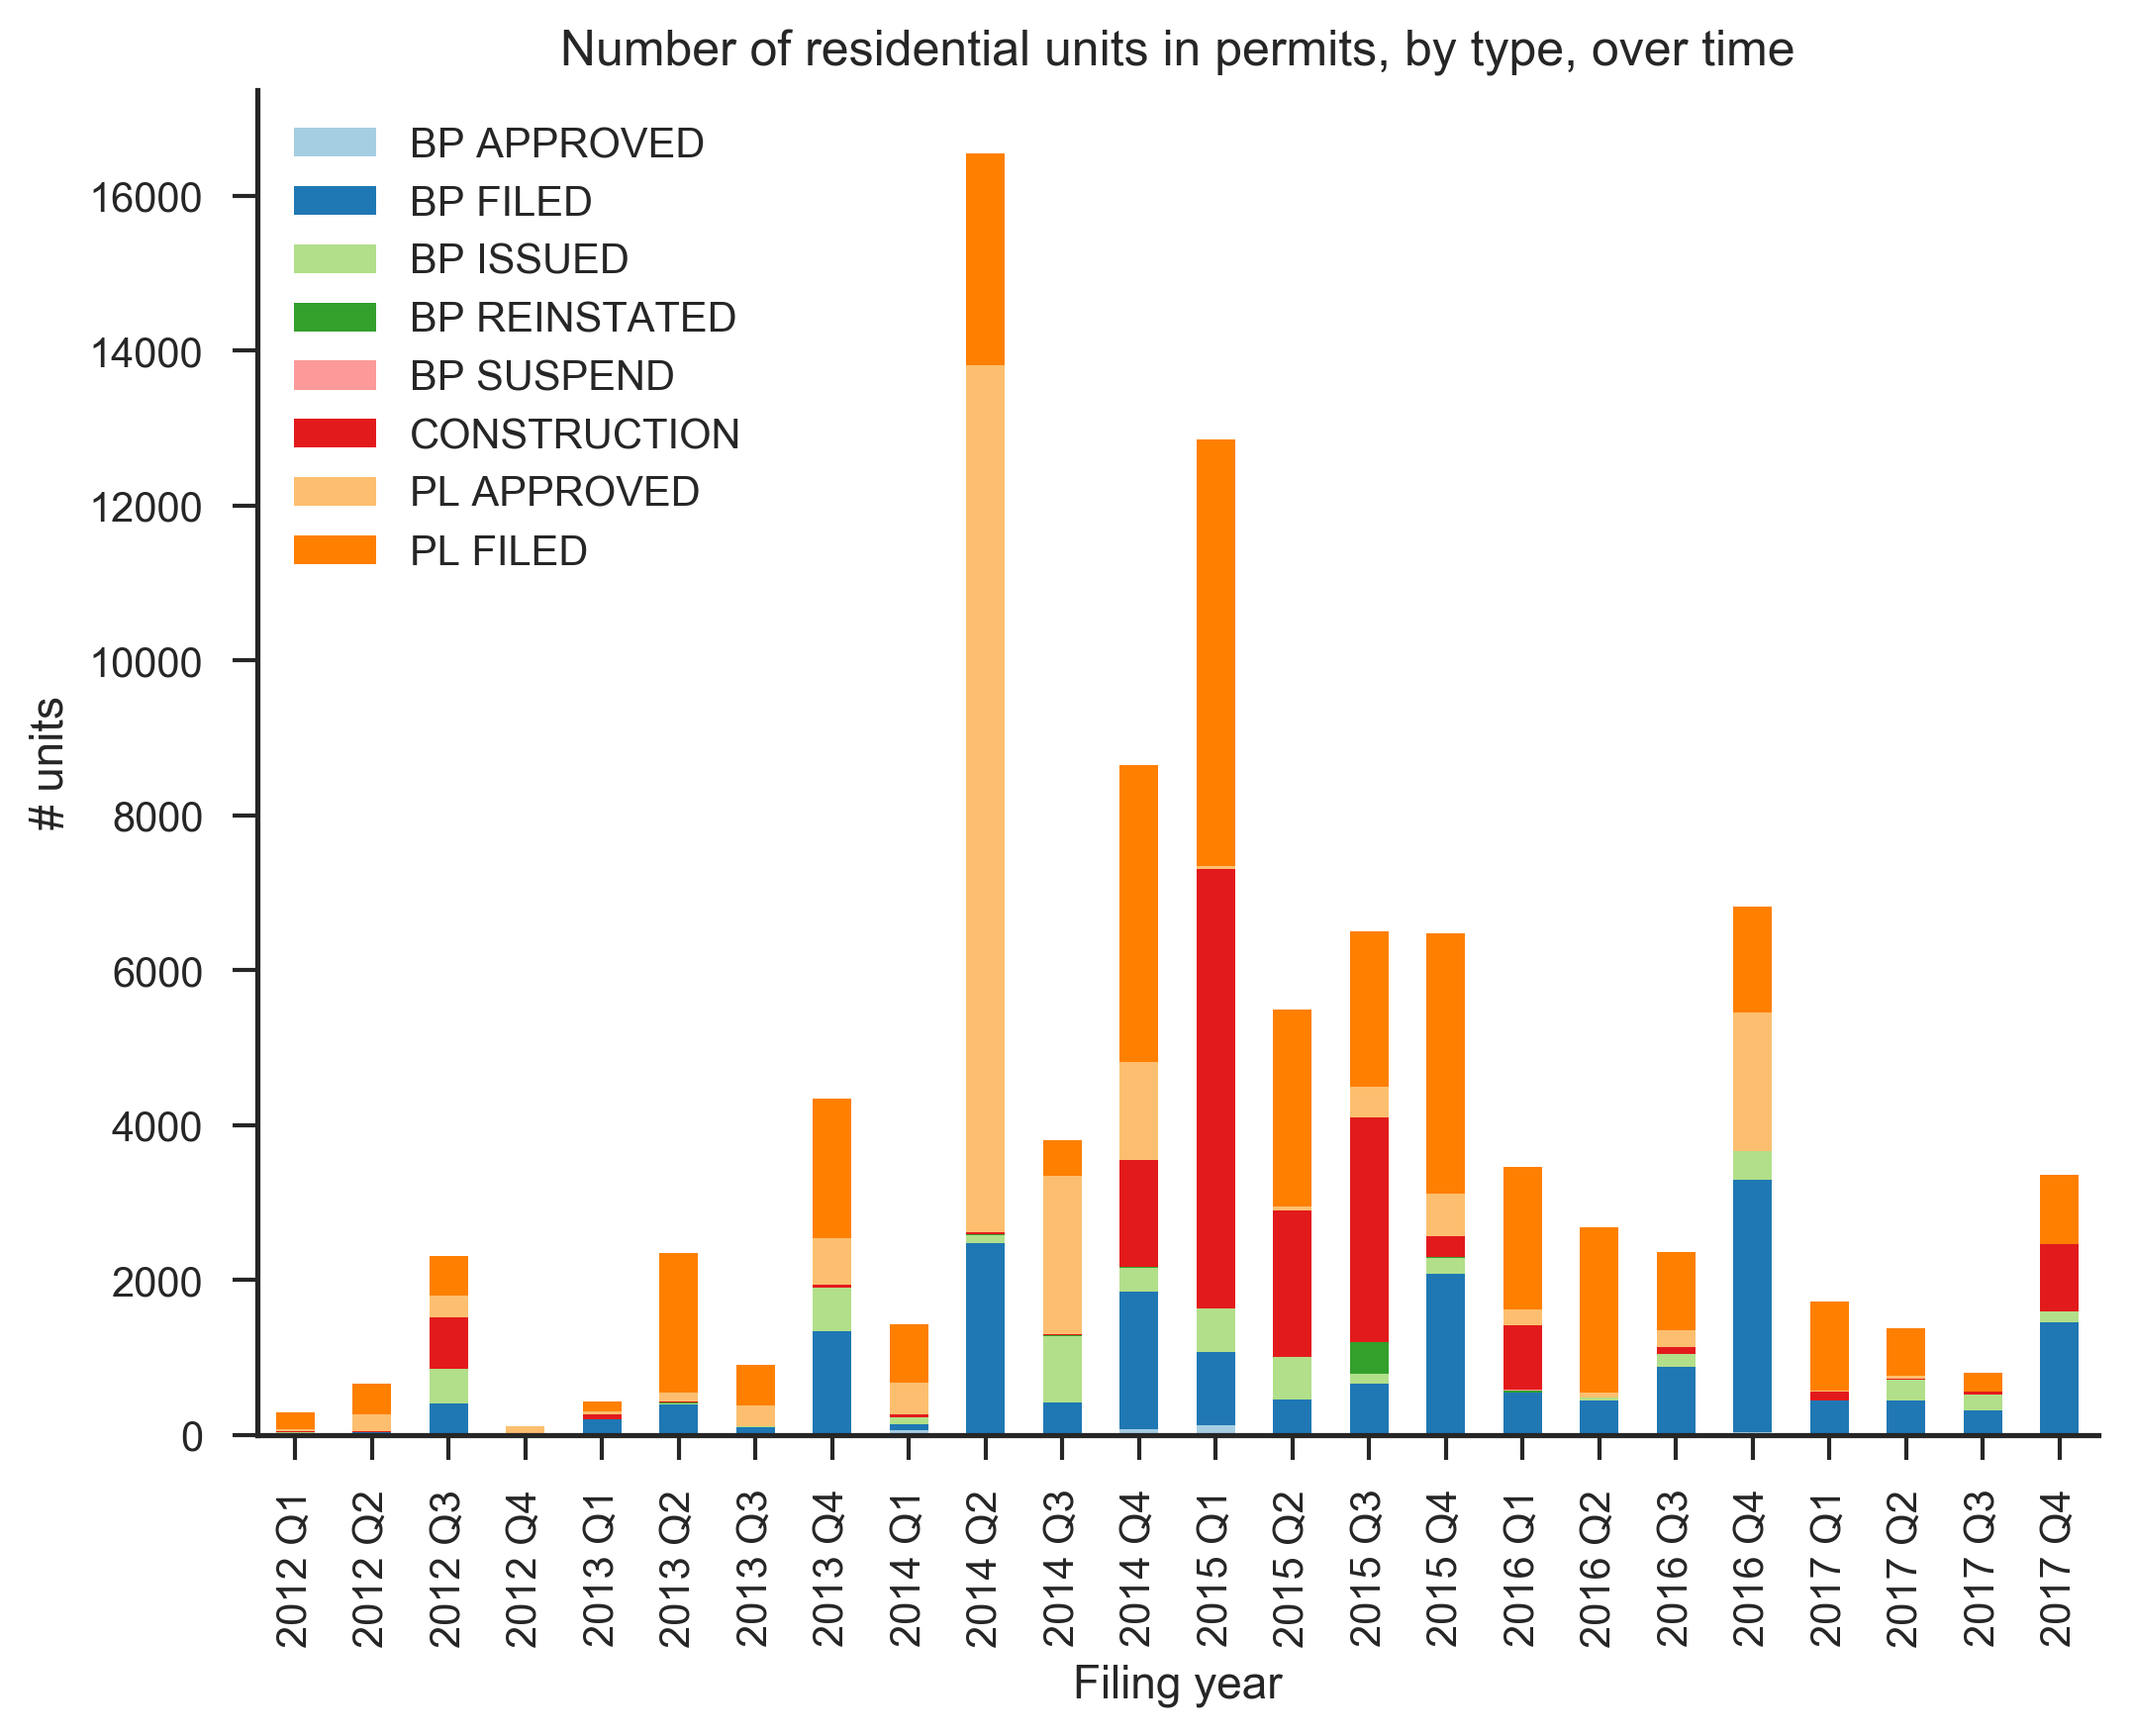

In [61]:
f = combined2[
    (combined2['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined2['Project Type'].isin(['Mixres', 'Resident', 'Vacant']))
]
ff = first_filings(f, min_year=2011, max_year=2018, datefield='Best Date', unitfield='Units')

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
with sns.color_palette(colors):
    f = mp.pyplot.figure()
    ax = f.gca()
    df = ff.groupby(['_quarter', 'Best Status']).aggregate({'Units': 'sum'}).unstack()
    df.columns = df.columns.droplevel(0)
    p = df.plot.bar(ax=ax, stacked=True)
    mp.pyplot.title('Number of residential units in permits, by type, over time')
    ax.set_ylabel("# units")
    ax.set_xlabel("Filing year")
    ax.legend(loc='upper left')
    f.set_size_inches(8, 6)
    f.set_dpi(300)
sns.despine()
f.savefig("figs/units-by-type-2017q4.png", dpi=300, bbox_inches='tight')

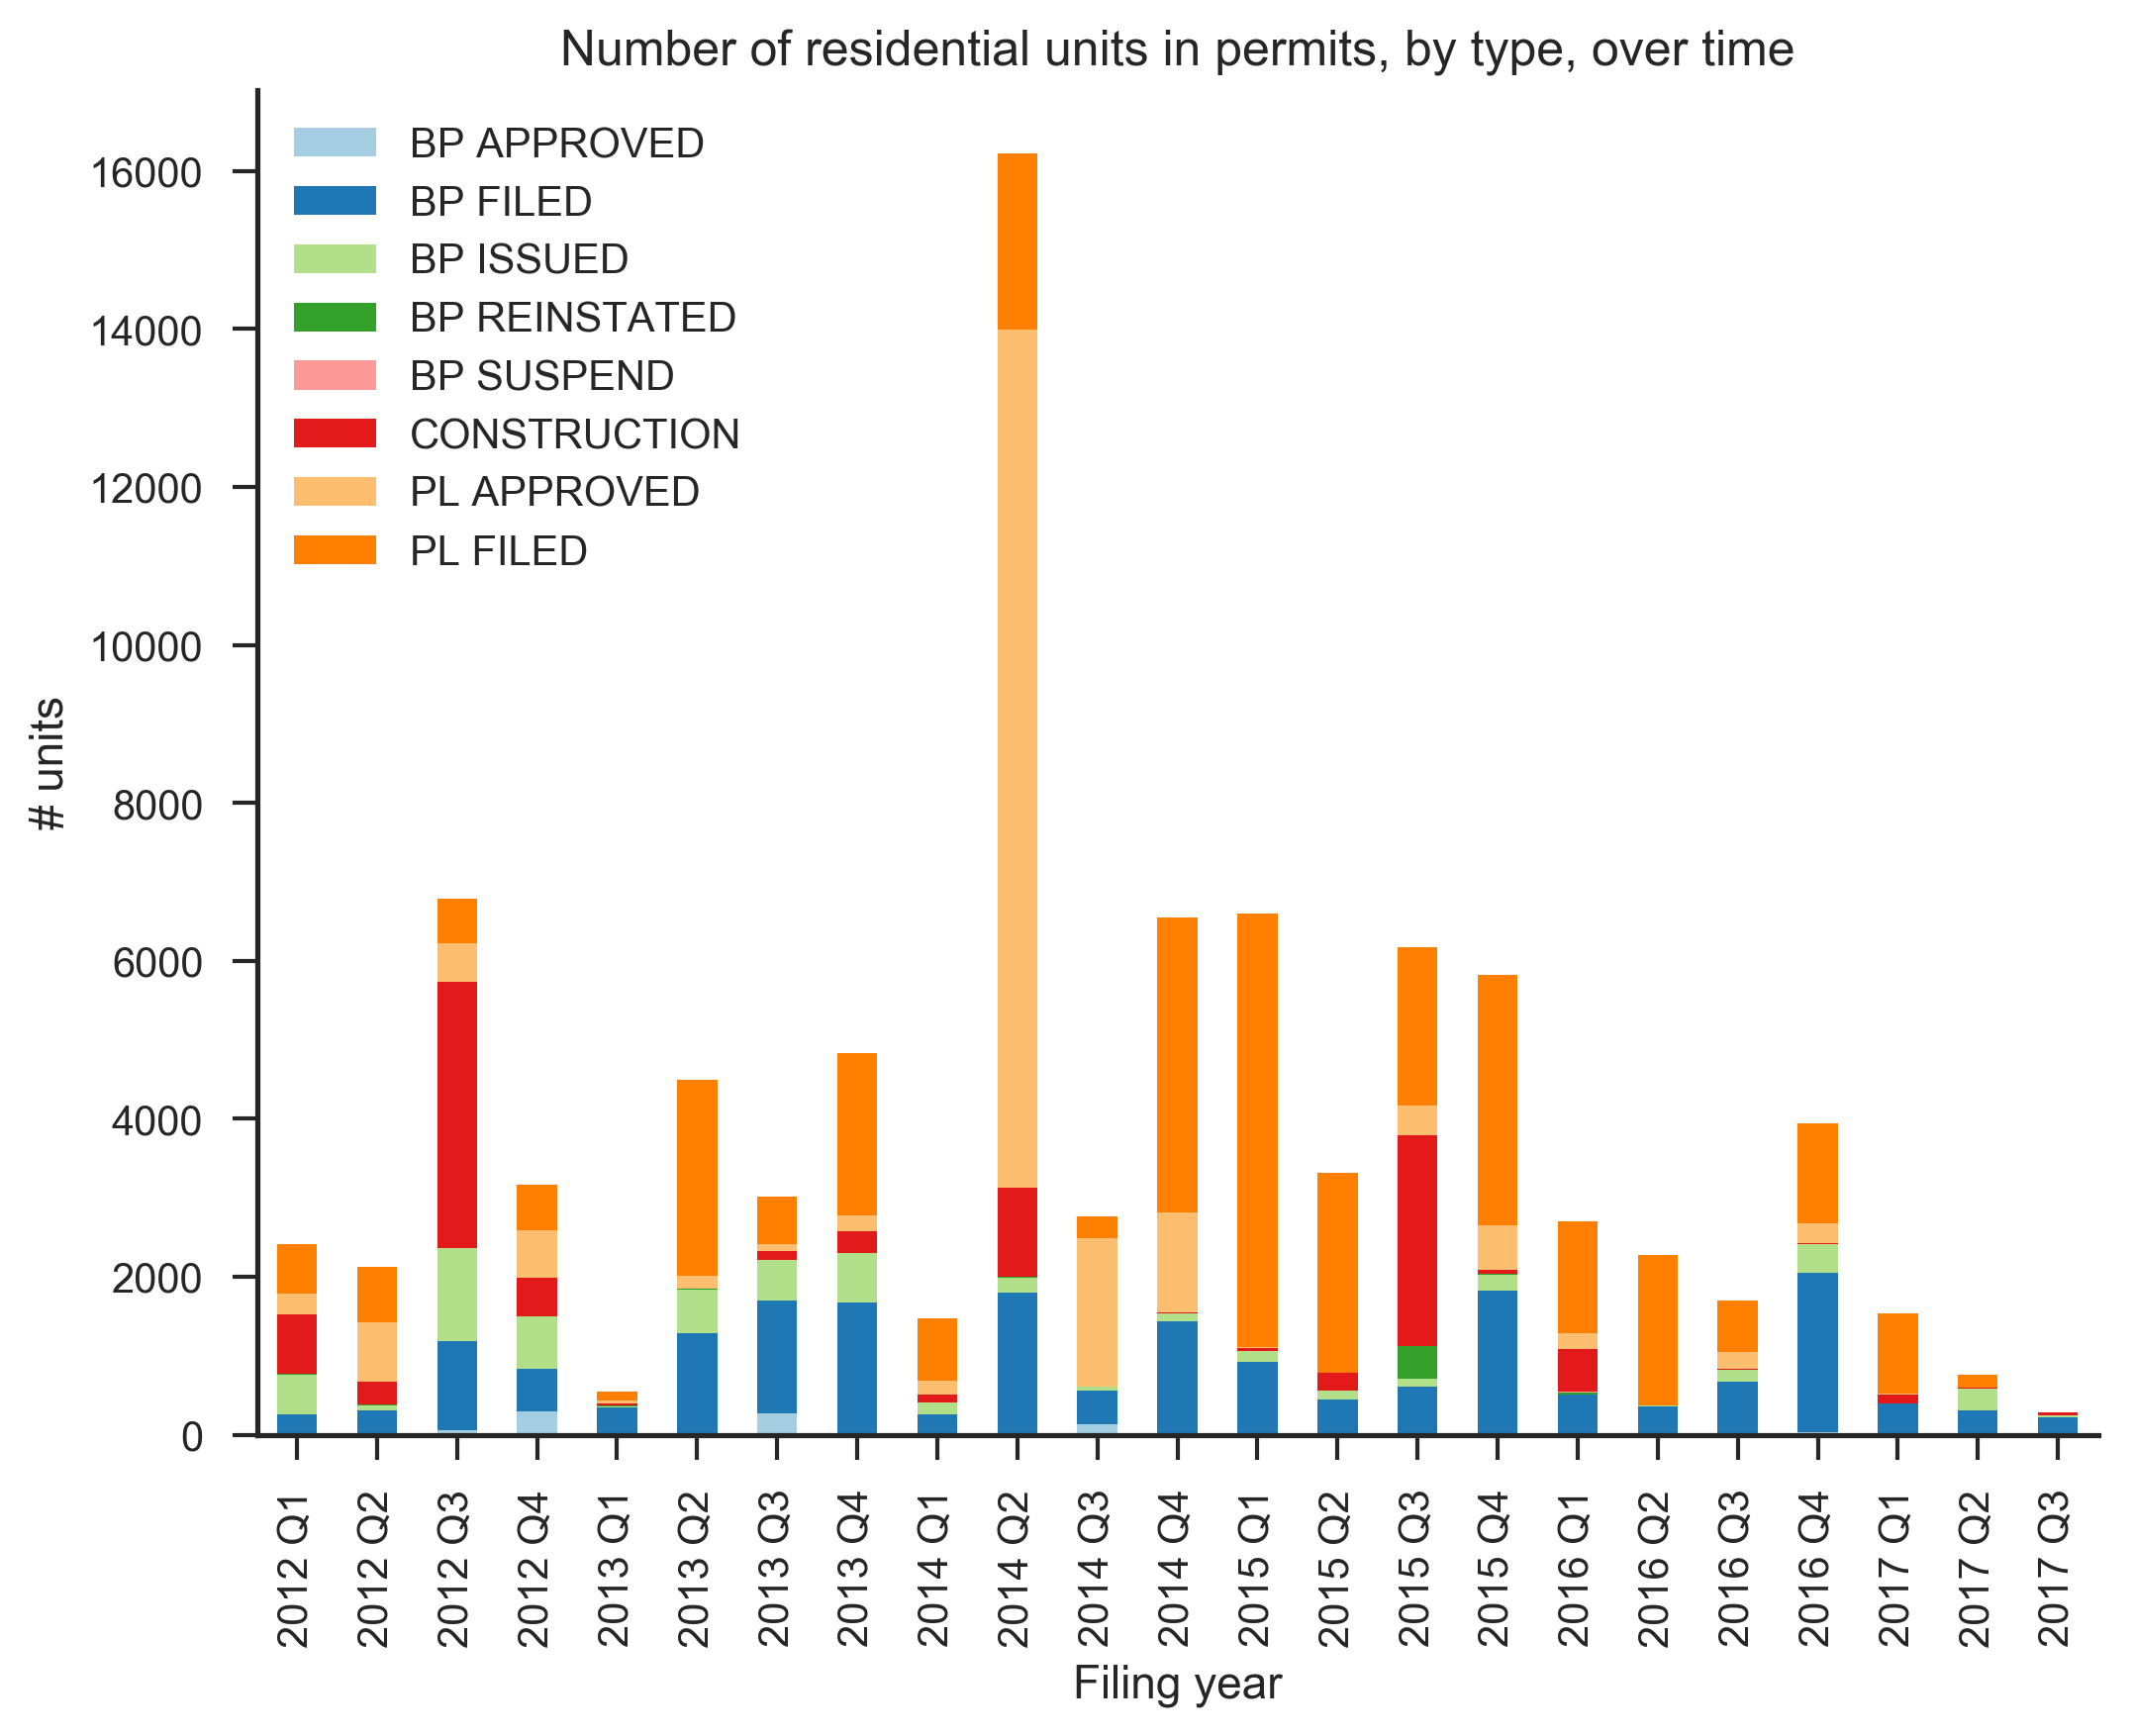

In [14]:
f = combined[
    (combined['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined['Project Type'].isin(['Mixres', 'Resident', 'Vacant']))
]
ff = first_filings(f, min_year=2011, max_year=2018, datefield='Best Date', unitfield='Units')
ff = ff[ff['Best Date'] < datetime(2017,10,1)]

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99']
with sns.color_palette(colors):
    f = mp.pyplot.figure()
    ax = f.gca()
    df = ff.groupby(['_quarter', 'Best Status']).aggregate({'Units': 'sum'}).unstack()
    df.columns = df.columns.droplevel(0)
    p = df.plot.bar(ax=ax, stacked=True)
    mp.pyplot.title('Number of residential units in permits, by type, over time')
    ax.set_ylabel("# units")
    ax.set_xlabel("Filing year")
    ax.legend(loc='upper left')
    f.set_size_inches(8, 6)
    f.set_dpi(300)
sns.despine()
f.savefig("figs/units-by-type.png", dpi=300, bbox_inches='tight')

In [15]:
f2015 = ff[ff['_year'] == '2015']
f2016 = ff[ff['_year'] == '2016']
f2017 = ff[ff['_year'] == '2017']

## DBI

In [18]:
# Data source: https://data.sfgov.org/Housing-and-Buildings/Building-Permits/i98e-djp9

dbi = pd.read_csv('./build-pipline/dbi/Building_Permits.tsv', delimiter="\t", parse_dates=[
    'Permit Creation Date', 'Permit Expiration Date', 'Current Status Date', 'Filed Date', 'Issued Date',
    'Completed Date', 'First Construction Document Date',], infer_datetime_format=True)
dbi['Blocklot'] = dbi['Block'] + dbi['Lot']

# Visualization

In [52]:
def quarter(dt):
    return "%s Q%s" % (dt.year, int(np.ceil((dt.month-1)/3)) + 1)


def half(dt):
    return "%s H%s" % (dt.year, int(np.ceil((dt.month-1)/6)) + 1)


def monthyear(dt):
    return "%s %s" % (dt.year, dt.strftime("%b"))


def first_filings(data, min_year=0, max_year=0, datefield='Filed Date', unitfield='Proposed Units'):
    min_year = min_year or data[datefield].min().year
    max_year = max_year or data[datefield].max().year + 1
    # first_seen is a hack to solve this issue:
    # multiple permit numbers are given to the same project on a given blocklot,
    # so there is a lot of duplication. first_seen is a heuristic that is basically:
    # "if a permit was filed to develop a parcel after 1995, we should consider that
    # one long-running project"
    #
    # This is needed so that we don't count a permit that, eg, was submitted in 2005
    # and re-submitted in 2008 as separate projects.
    #
    # It also ignore permits that don't have any proposed units, as those can be
    # considered preliminary permits
    first_seen = data[(data[datefield] > datetime(2005,1,1)) &
                      (data[unitfield] > 0)].groupby(['Blocklot']).aggregate({
        datefield: 'min'
    })

    # Build a new data frame that only consists of the very first time the project was seen
    first_filings = pd.DataFrame(columns=data.columns)
    num_filings = []
    for year in range(min_year+1, max_year):
        filed_in_year = data[
            (data[datefield] < datetime(year+1,1,1)) &
            (data[datefield] > datetime(year,1,1)) &
            (~data['Blocklot'].isin(first_seen[first_seen[datefield] < datetime(year,1,1)].index))]
        filed_in_year = filed_in_year.drop_duplicates(['Blocklot', 'Best Status'])
        num_filings.append(len(filed_in_year))
        first_filings = first_filings.append(filed_in_year)
    
    # Useful time periods for plotting
    first_filings['_year'] = first_filings[datefield].apply(lambda dt: str(dt.year))
    first_filings['_quarter'] = first_filings[datefield].apply(quarter)
    first_filings['_half'] = first_filings[datefield].apply(half)
    first_filings['_month'] = first_filings[datefield].apply(monthyear)
    return first_filings


def plot(data, title, min_year=0, max_year=0, datefield='Filed Date', unitfield='Proposed Units', groupby="_year"):
    min_year = min_year or data[datefield].min().year
    max_year = max_year or data[datefield].max().year
    
    ff = first_filings(data, min_year, max_year, datefield, unitfield)
    
    agg = ff.groupby([ff[groupby]]).aggregate({
        unitfield: {
            #'total': 'sum',
            'Units in small buildings': lambda ds: ds[ds < 25].sum(),
            'Small permits': lambda ds: ds[ds < 25].count(),
            'Units in large buildings': lambda ds: ds[ds >= 25].sum(),
            'Large permits': lambda ds: ds[ds >= 25].count(),
        }
    })

    f = mp.pyplot.figure()
    #f, ax = plt.subplots(1)
    ax = f.gca()
    axr = ax.twinx()
    p = agg[unitfield][['Units in small buildings', 'Units in large buildings']].plot.bar(ax=ax, stacked=True);
    
    agg[unitfield][['Small permits', 'Large permits']].plot(ax=axr, zorder=2);
    mp.pyplot.title(title)
    ax.set_ylabel("# Housing units")
    ax.set_xlabel("Filing year")
    ax.legend(loc='upper left')
    axr.set_ylabel("# Permits filed")
    axr.legend(loc='upper right')
    f.set_size_inches(8, 6)
    f.set_dpi(300)
    
    return agg


## Planning

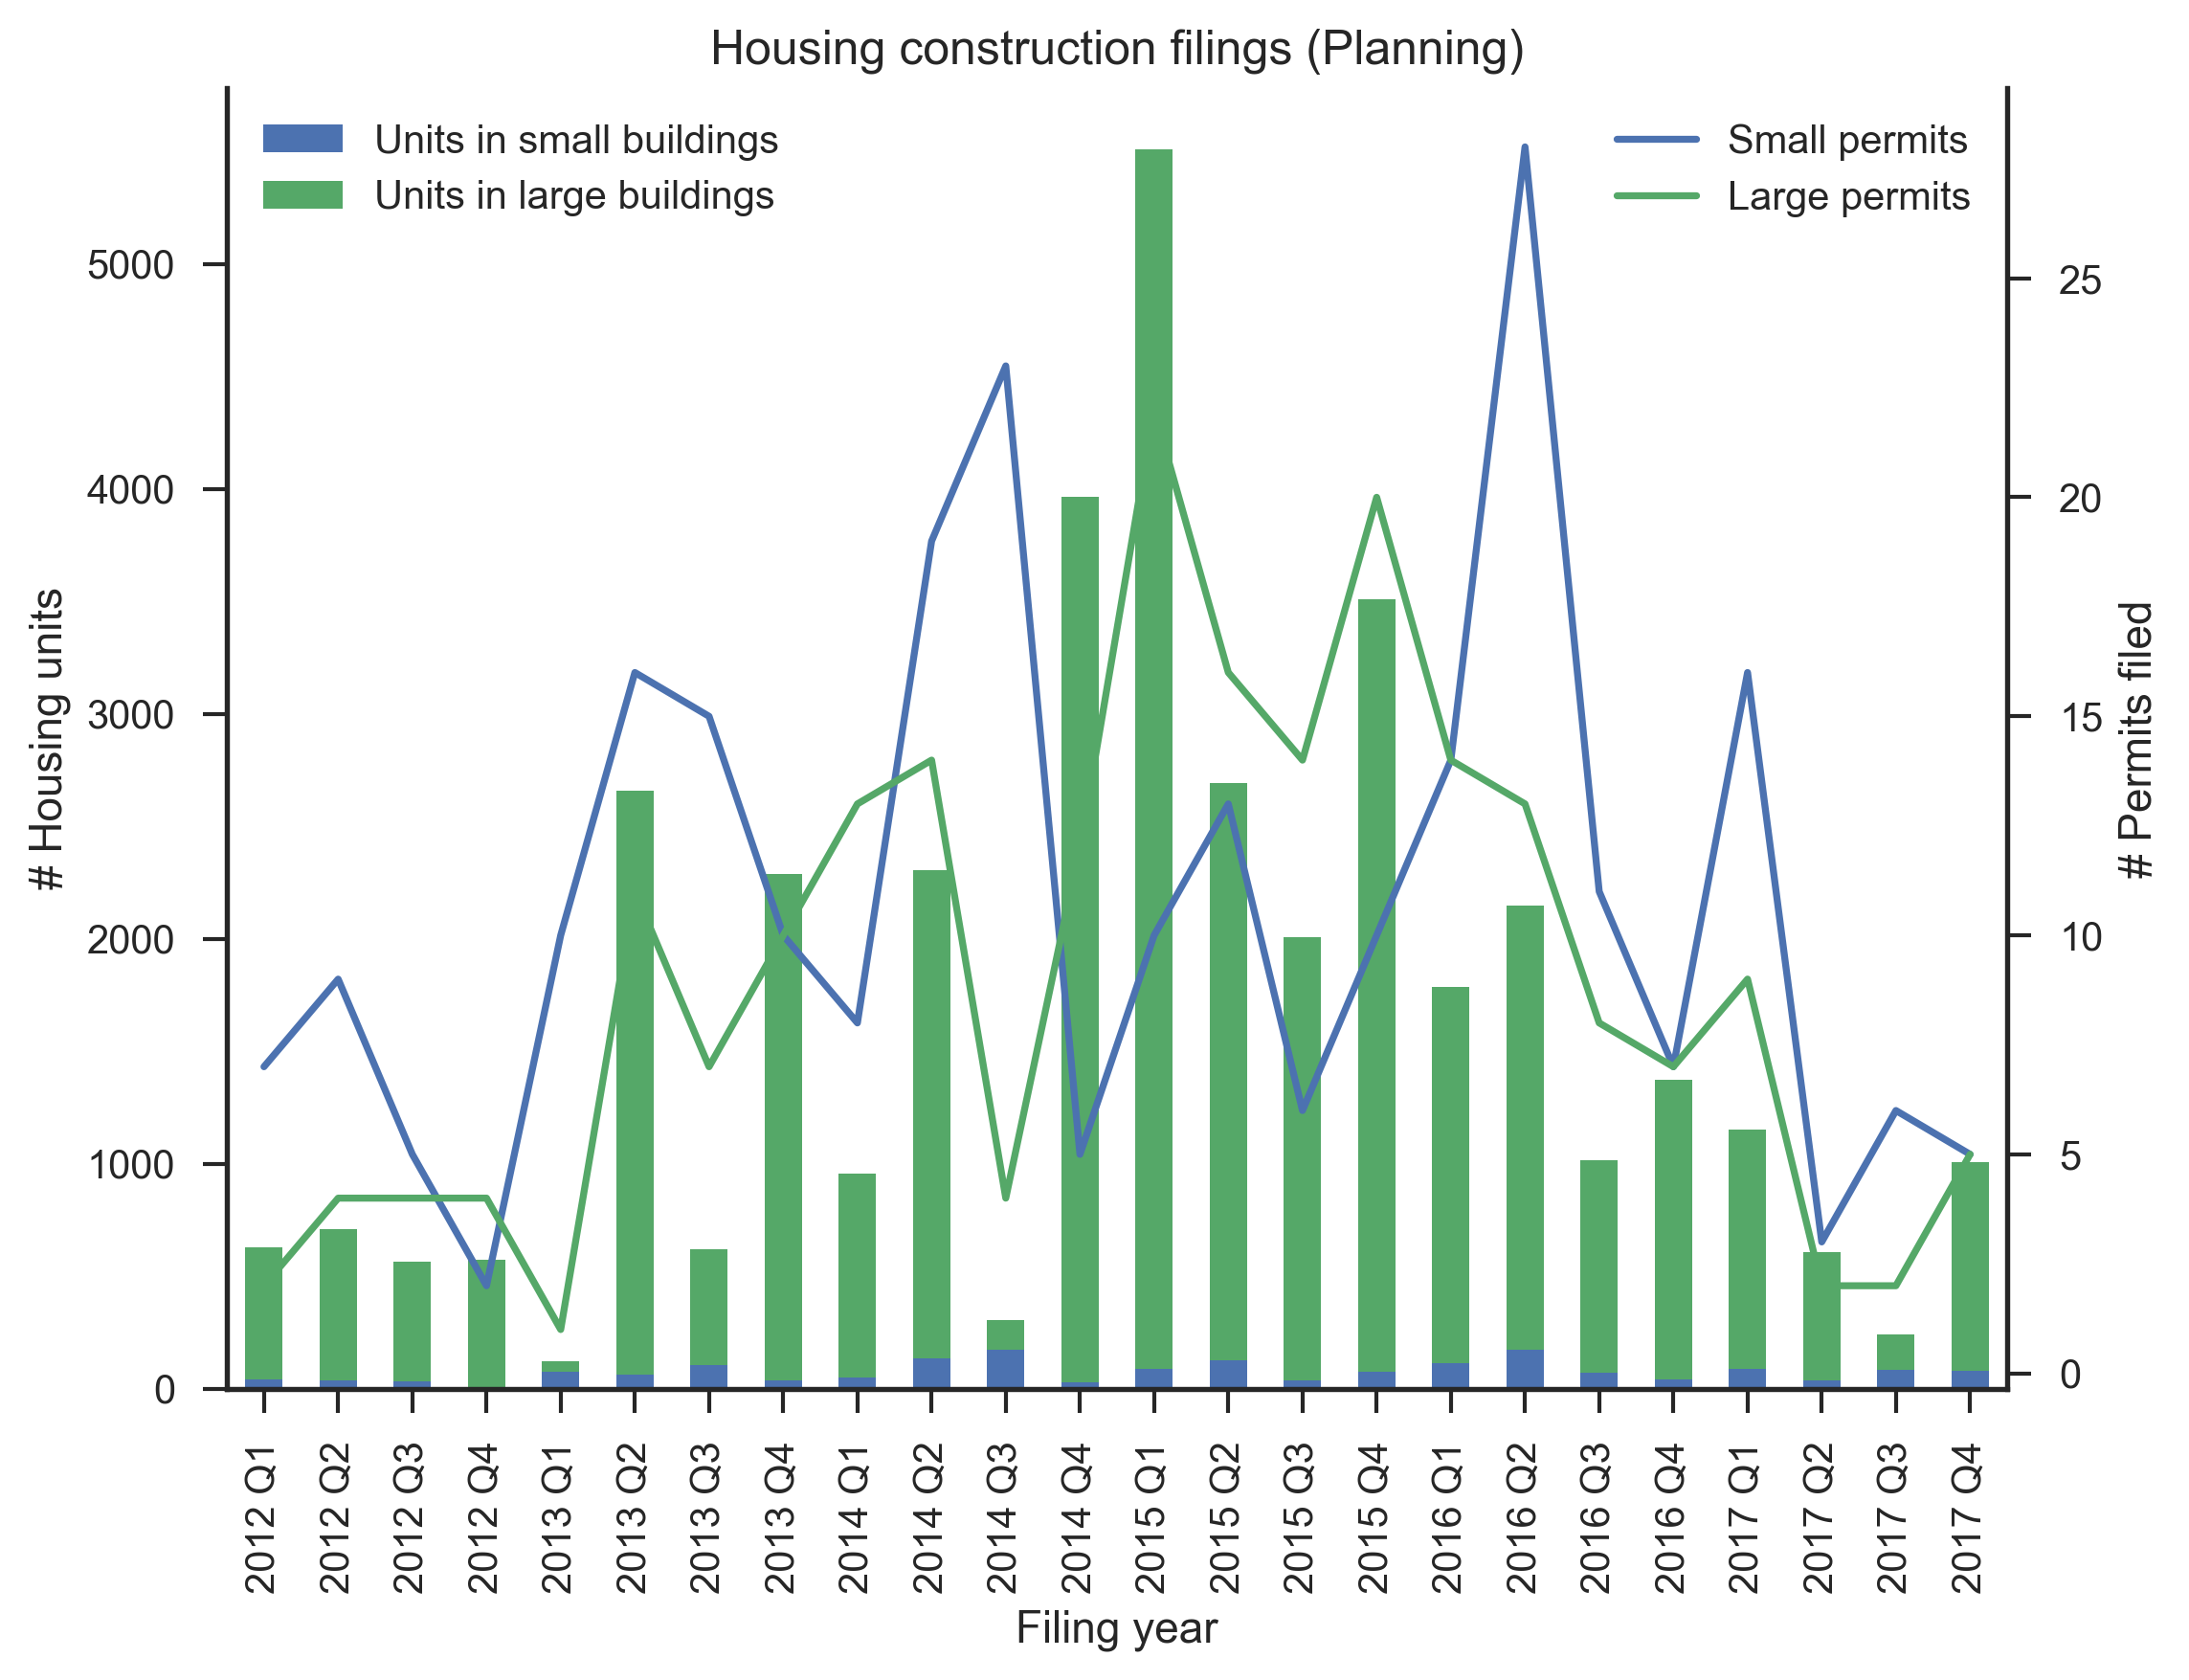

In [64]:
data = combined2[
    (combined2['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined2['Best Status'] == "PL FILED")  # Only look at new applications
]
combined_agg = plot(data, "Housing construction filings (Planning)", 2011, 2018, 'Best Date', 'Units', groupby="_quarter")
sns.despine(top=True, right=False)
plt.gcf().savefig("figs/housing-applications-planning-quarter-2017q4.png", dpi=300, bbox_inches='tight')

/home/sbuss/envs/mvf/local/lib/python2.7/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


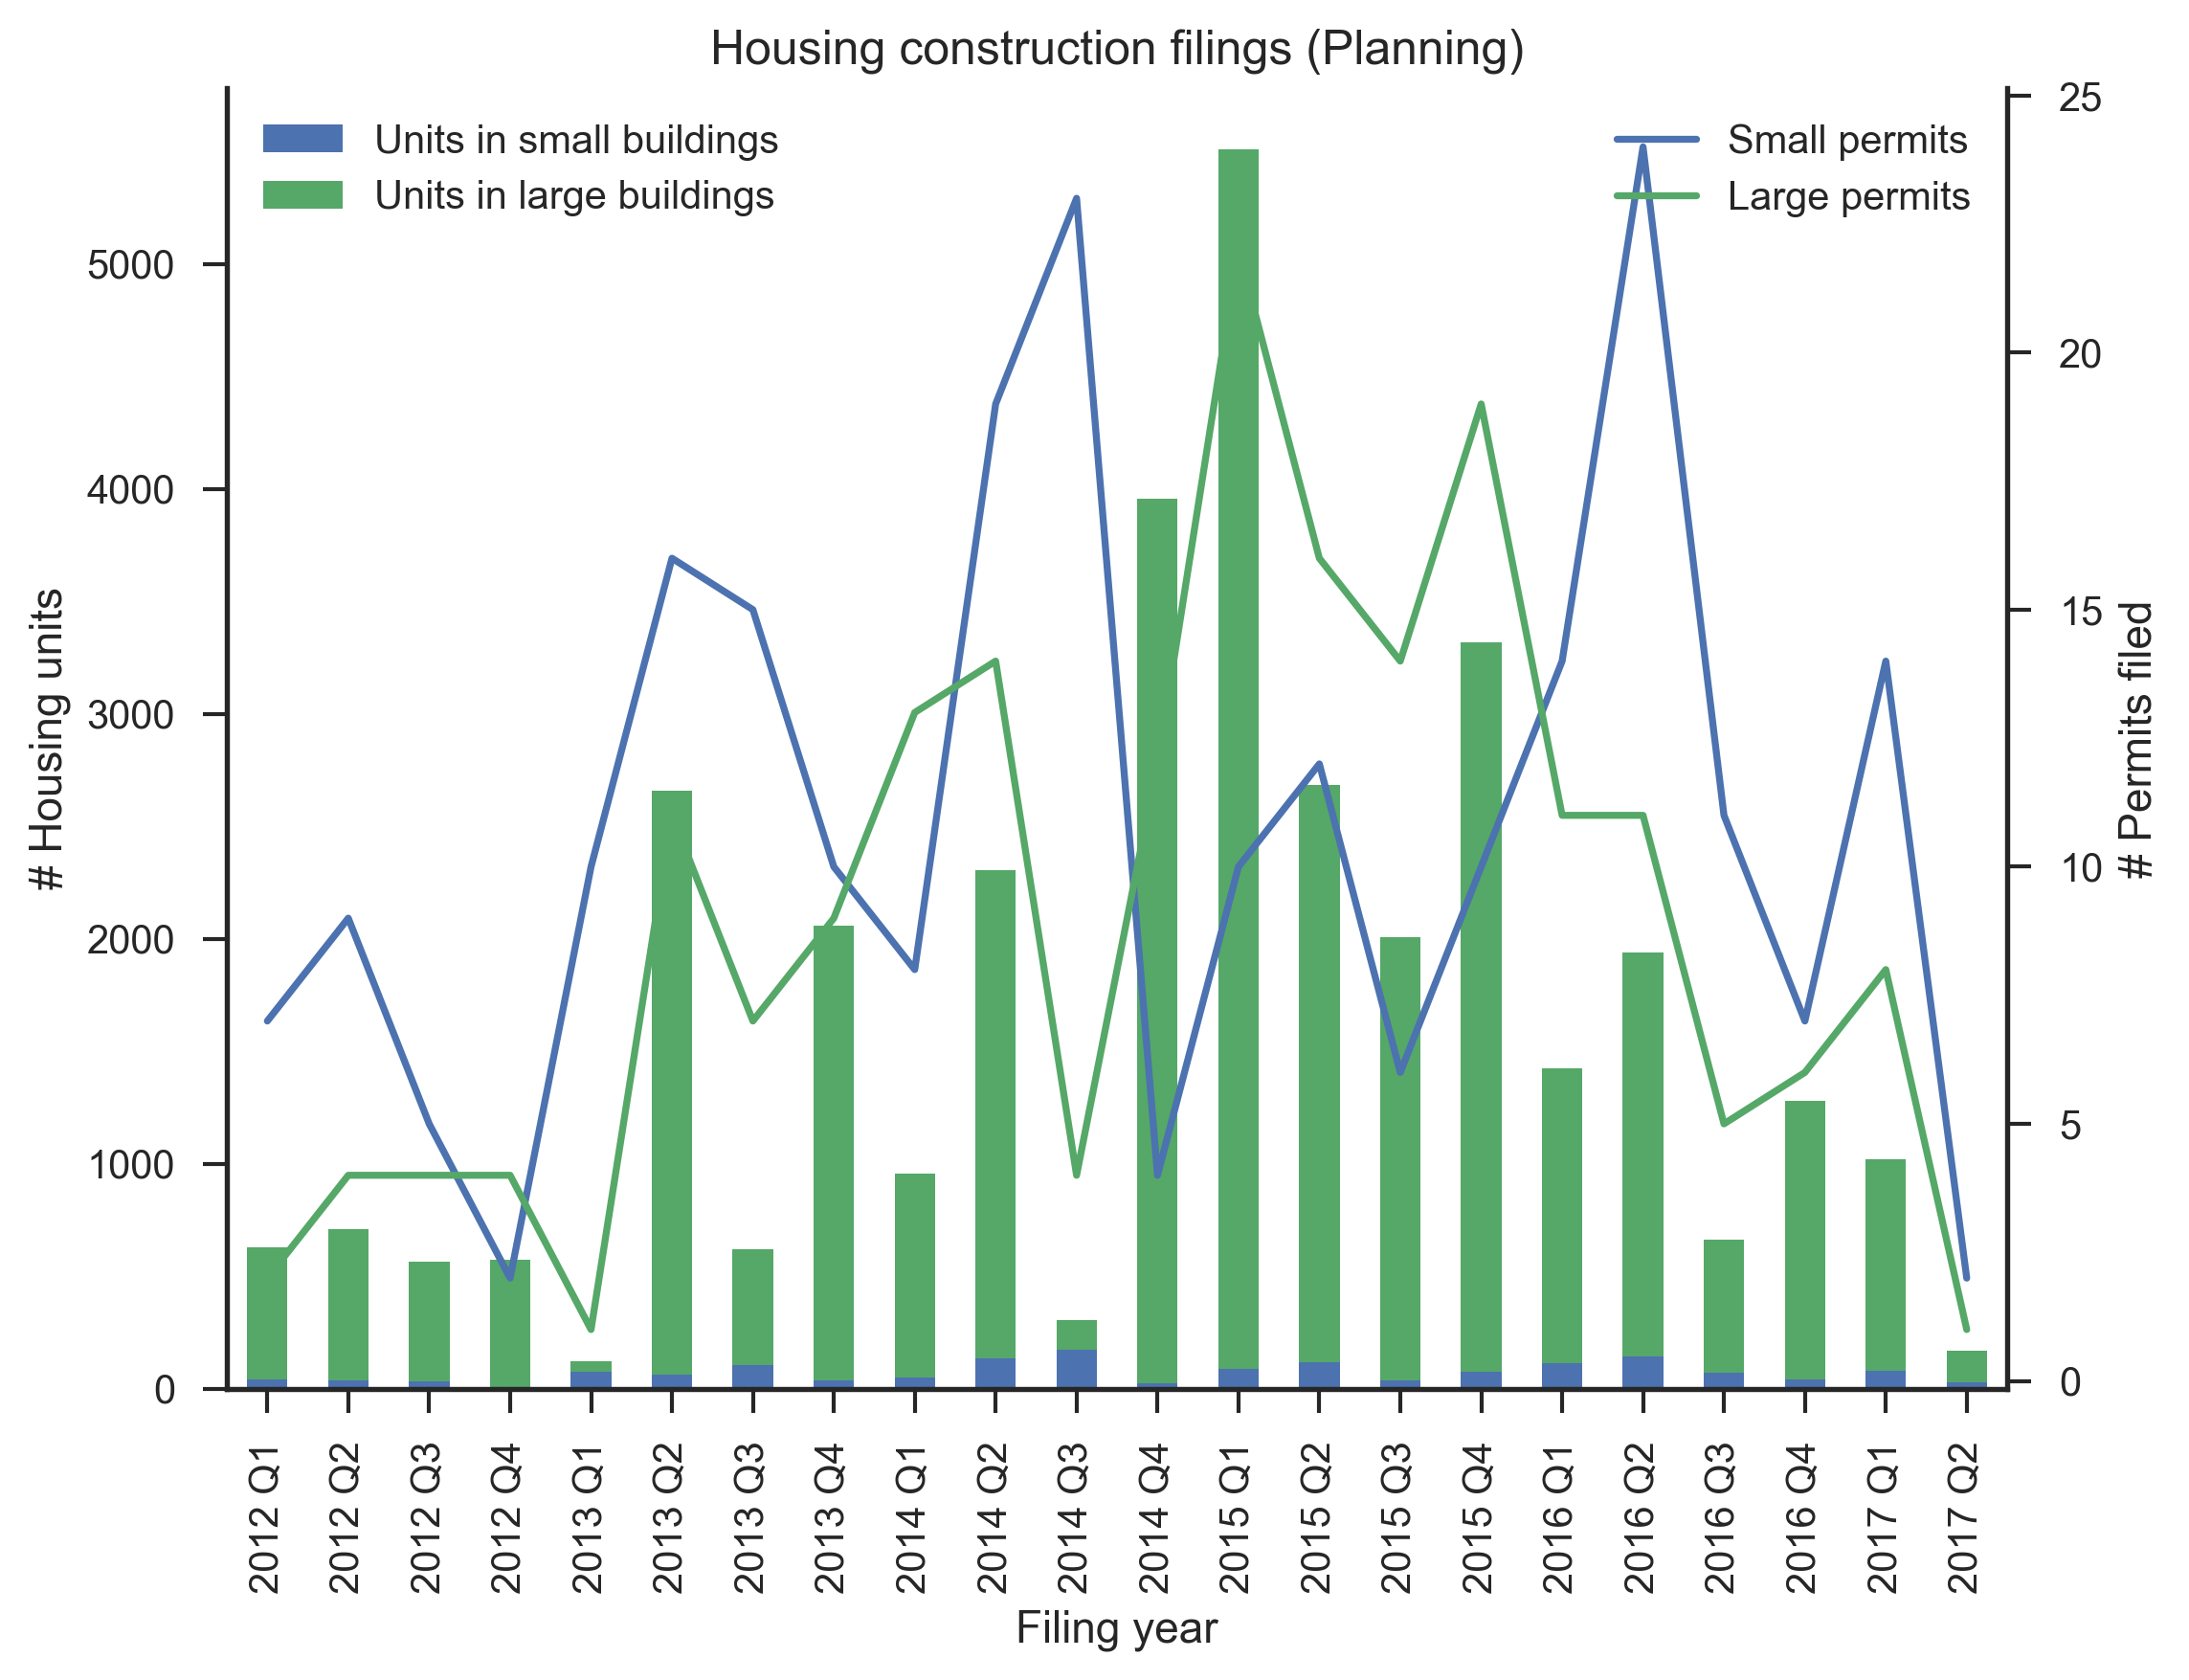

In [11]:
data = combined[
    (combined['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined['Best Status'] == "PL FILED")  # Only look at new applications
]
combined_agg = plot(data, "Housing construction filings (Planning)", 2011, 2018, 'Best Date', 'Units', groupby="_quarter")
sns.despine(top=True, right=False)
plt.gcf().savefig("figs/housing-applications-planning-quarter.png", dpi=300, bbox_inches='tight')

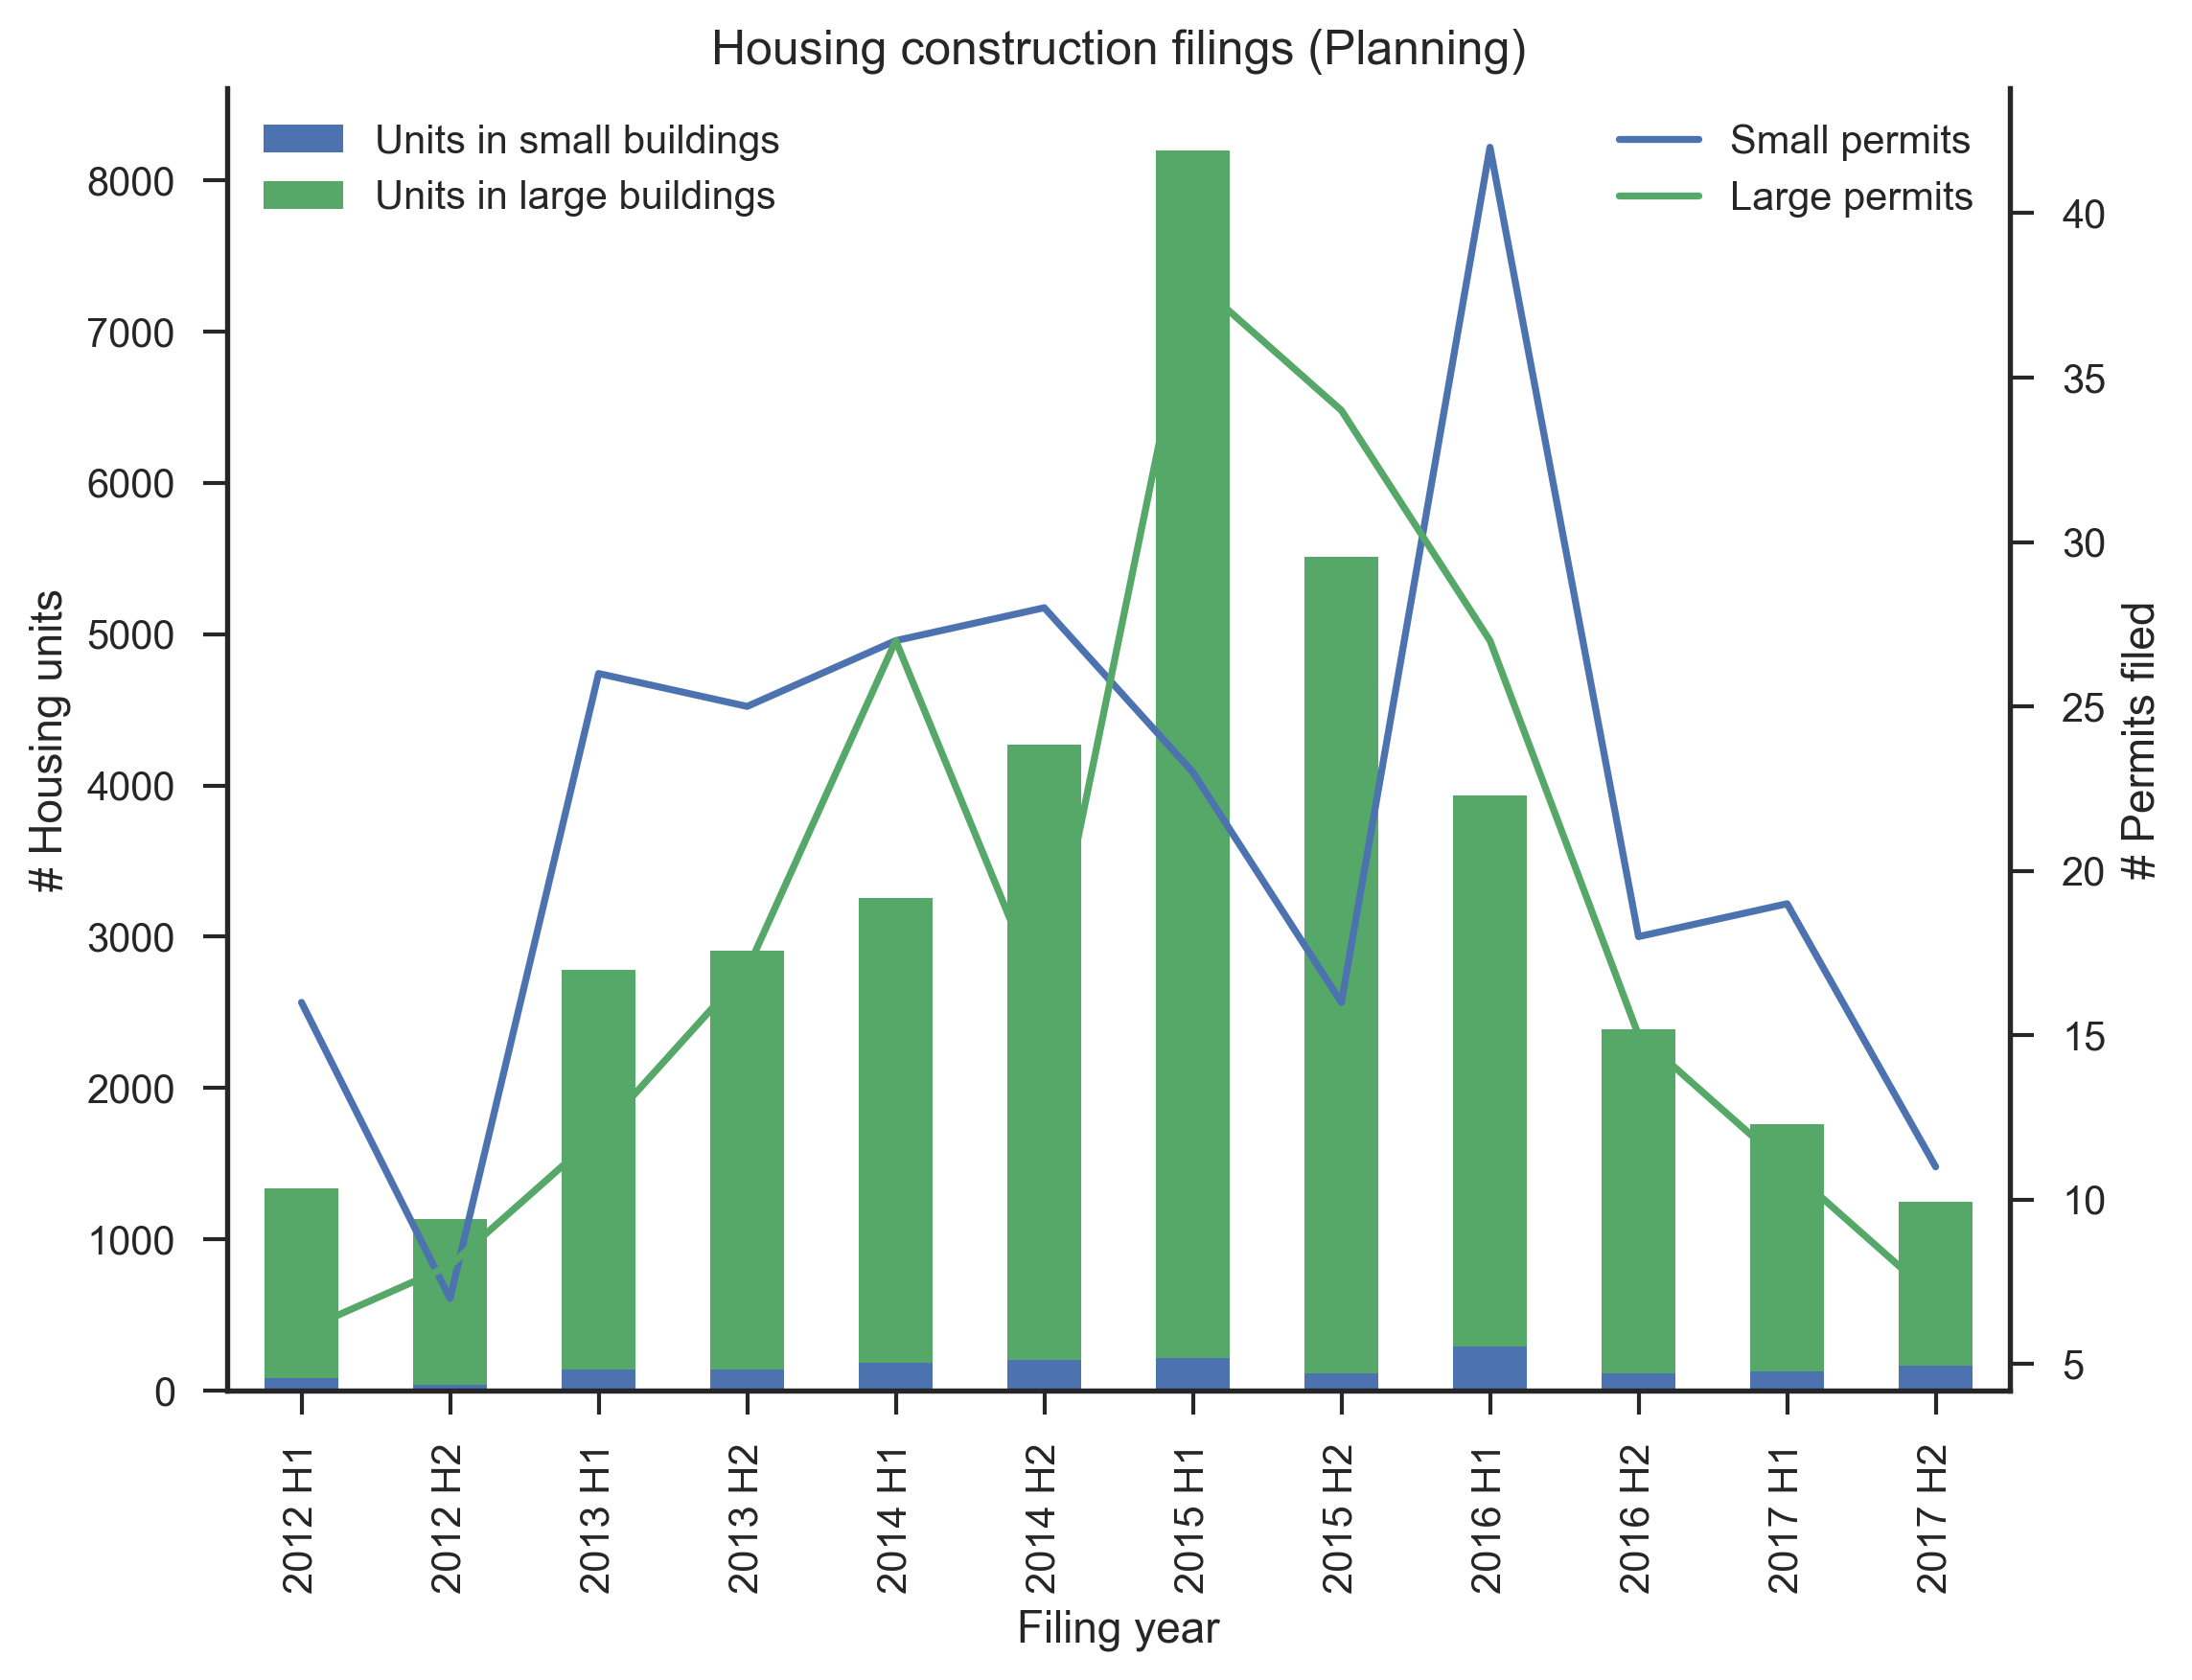

In [65]:
data = combined2[
    (combined2['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined2['Best Status'] == "PL FILED")  # Only look at new applications
]
combined_agg = plot(data, "Housing construction filings (Planning)", 2011, 2018, 'Best Date', 'Units', groupby="_half")
sns.despine(top=True, right=False)
plt.gcf().savefig("figs/housing-applications-planning-half-2017q4.png", dpi=300, bbox_inches='tight')

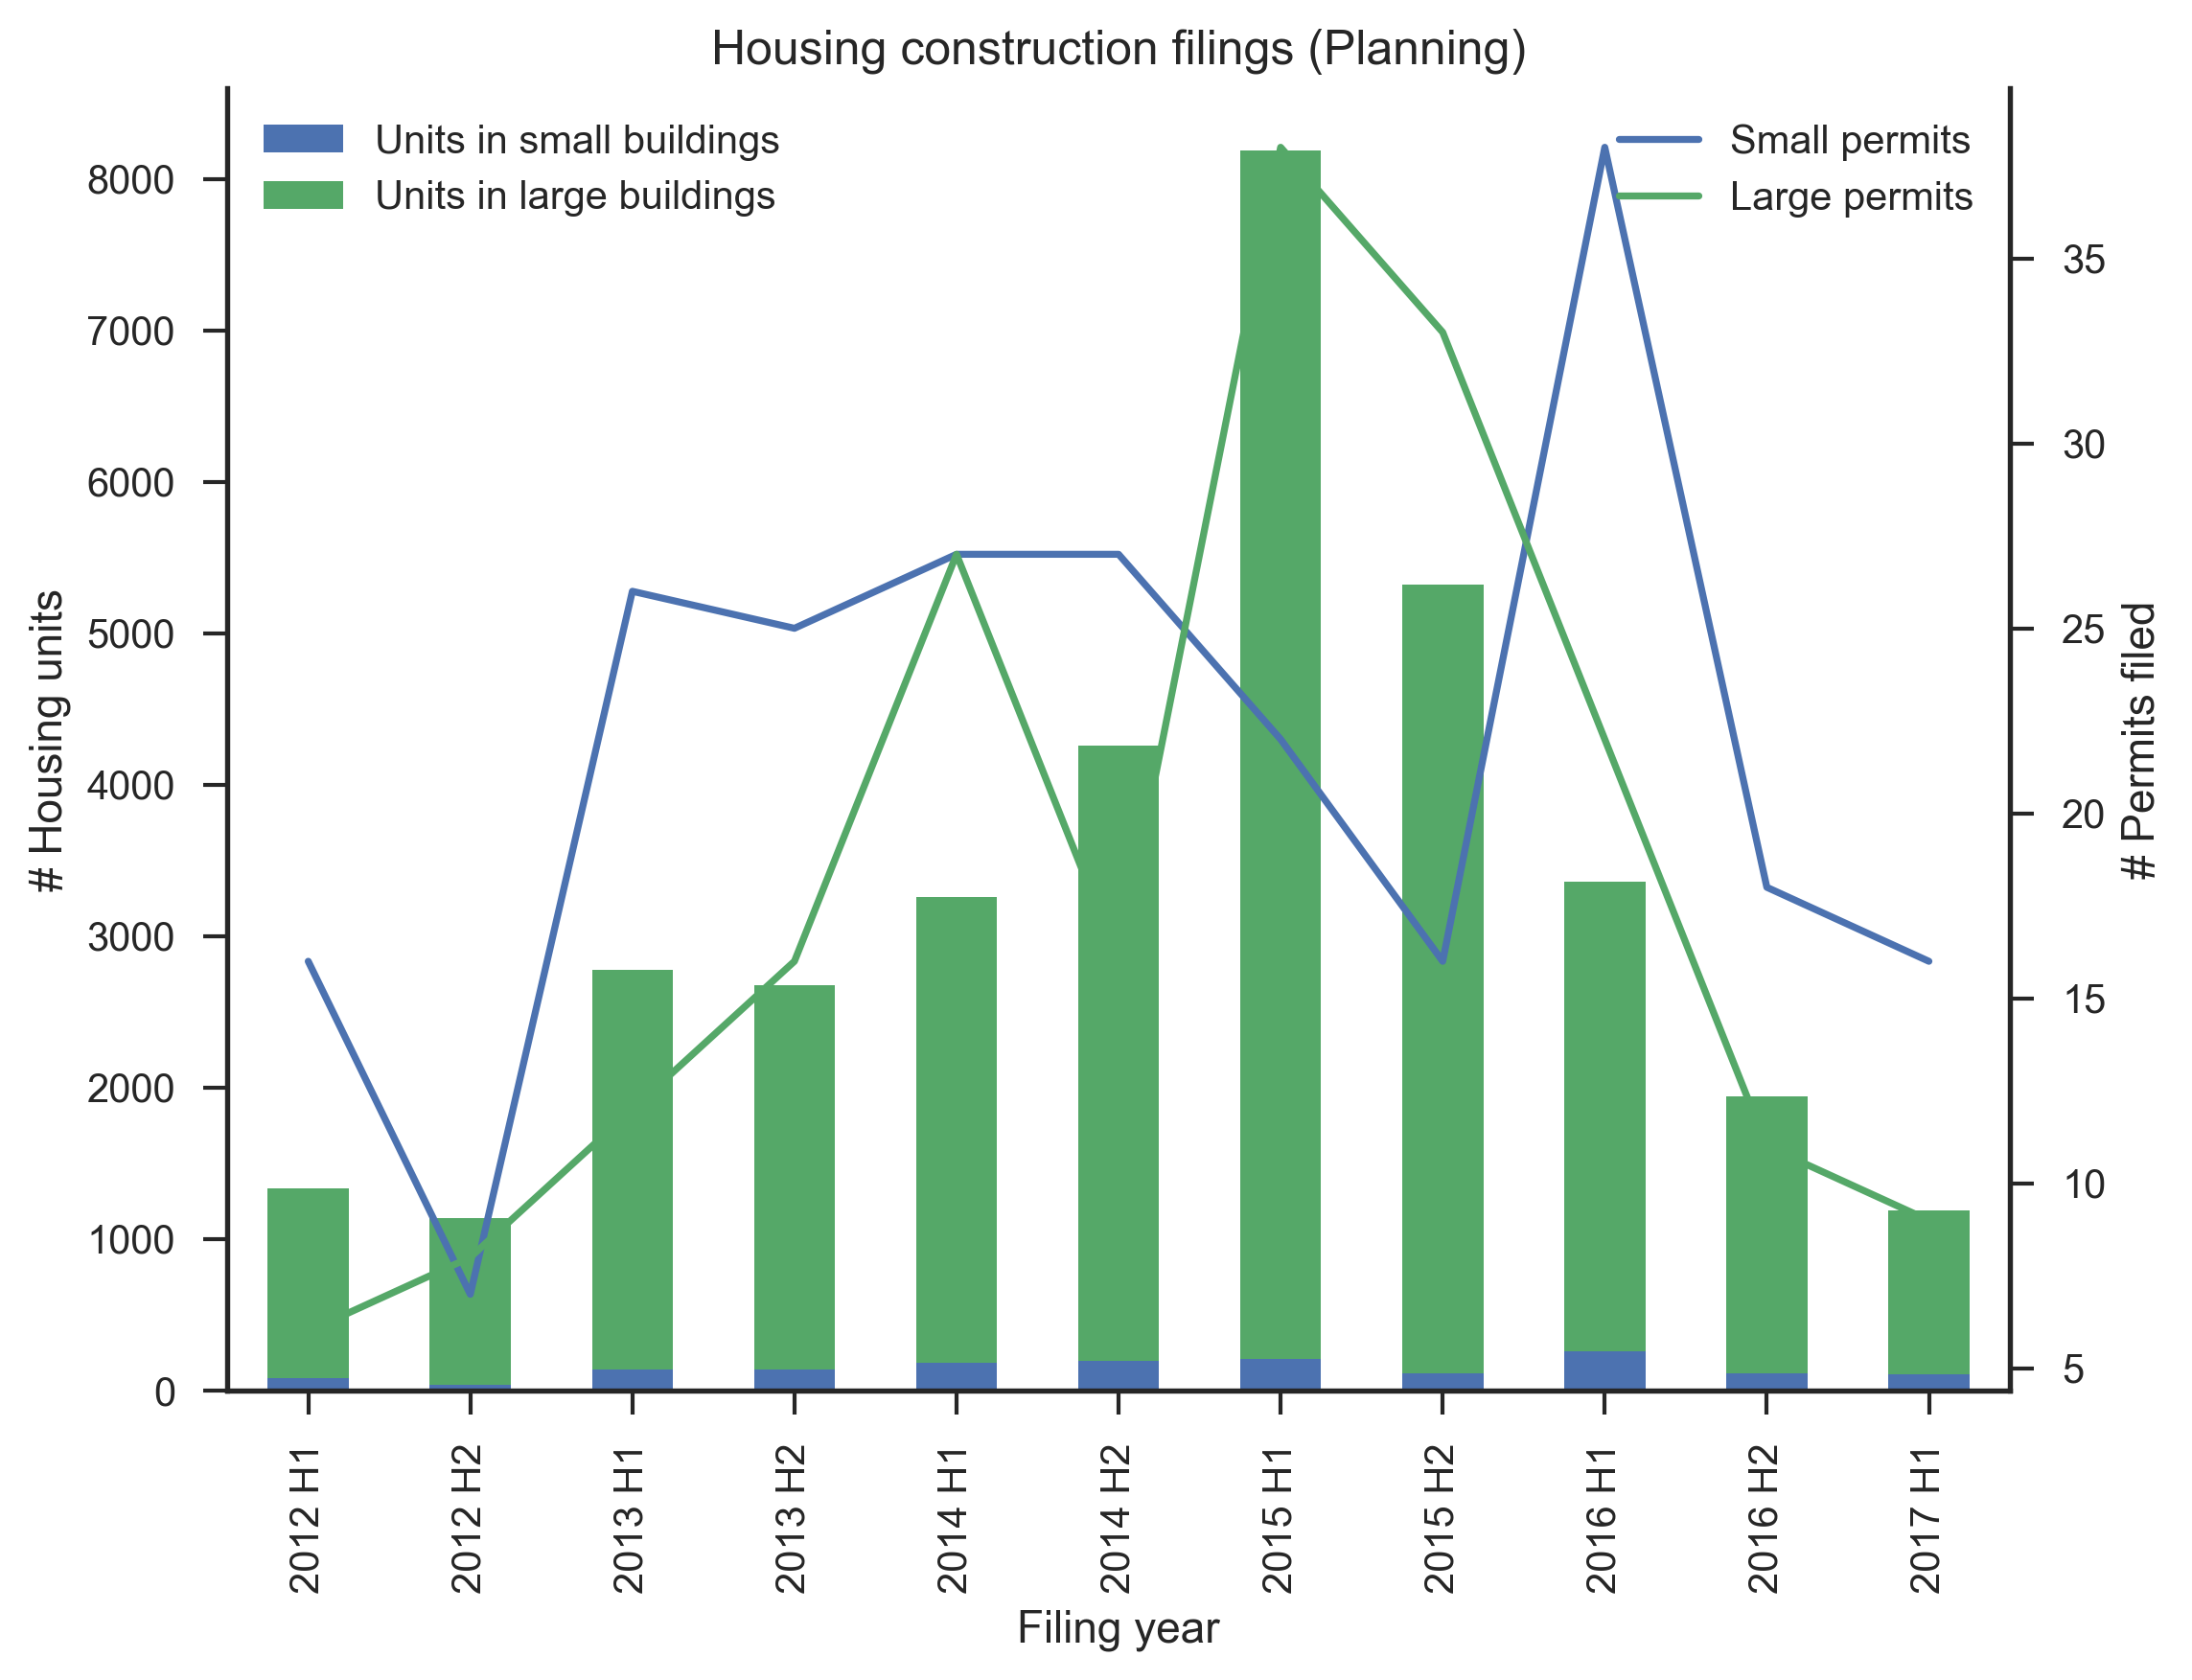

In [18]:
data = combined[
    (combined['Units'] > 0) &  # Exclude entries without units, since those are likely preliminary
    (combined['Best Status'] == "PL FILED")  # Only look at new applications
]
combined_agg = plot(data, "Housing construction filings (Planning)", 2011, 2018, 'Best Date', 'Units', groupby="_half")
sns.despine(top=True, right=False)
plt.gcf().savefig("figs/housing-applications-planning-half.png", dpi=300, bbox_inches='tight')

# DBI

In [418]:
post_2000 = dbi[dbi['Filed Date'] >= datetime(2000,1,1)]
post_2000_construction = post_2000[post_2000['Permit Type Definition'].isin(['new construction wood frame', 'new construction'])]

post_2012 = dbi[dbi['Filed Date'] >= datetime(2012,1,1)]
post_2012_construction = post_2012[post_2012['Permit Type Definition'].isin(['new construction wood frame', 'new construction'])]

In [421]:
post_2000_residential = post_2000_construction[post_2000_construction['Proposed Use'].isin([
    '1 family dwelling',
    '2 family dwelling',
    'apartments',
    'misc group residns.',
    'residential hotel',
    'tower',
])]

post_2012_residential = post_2012_construction[post_2012_construction['Proposed Use'].isin([
    '1 family dwelling',
    '2 family dwelling',
    'apartments',
    'misc group residns.',
    'residential hotel',
    'tower',
])]

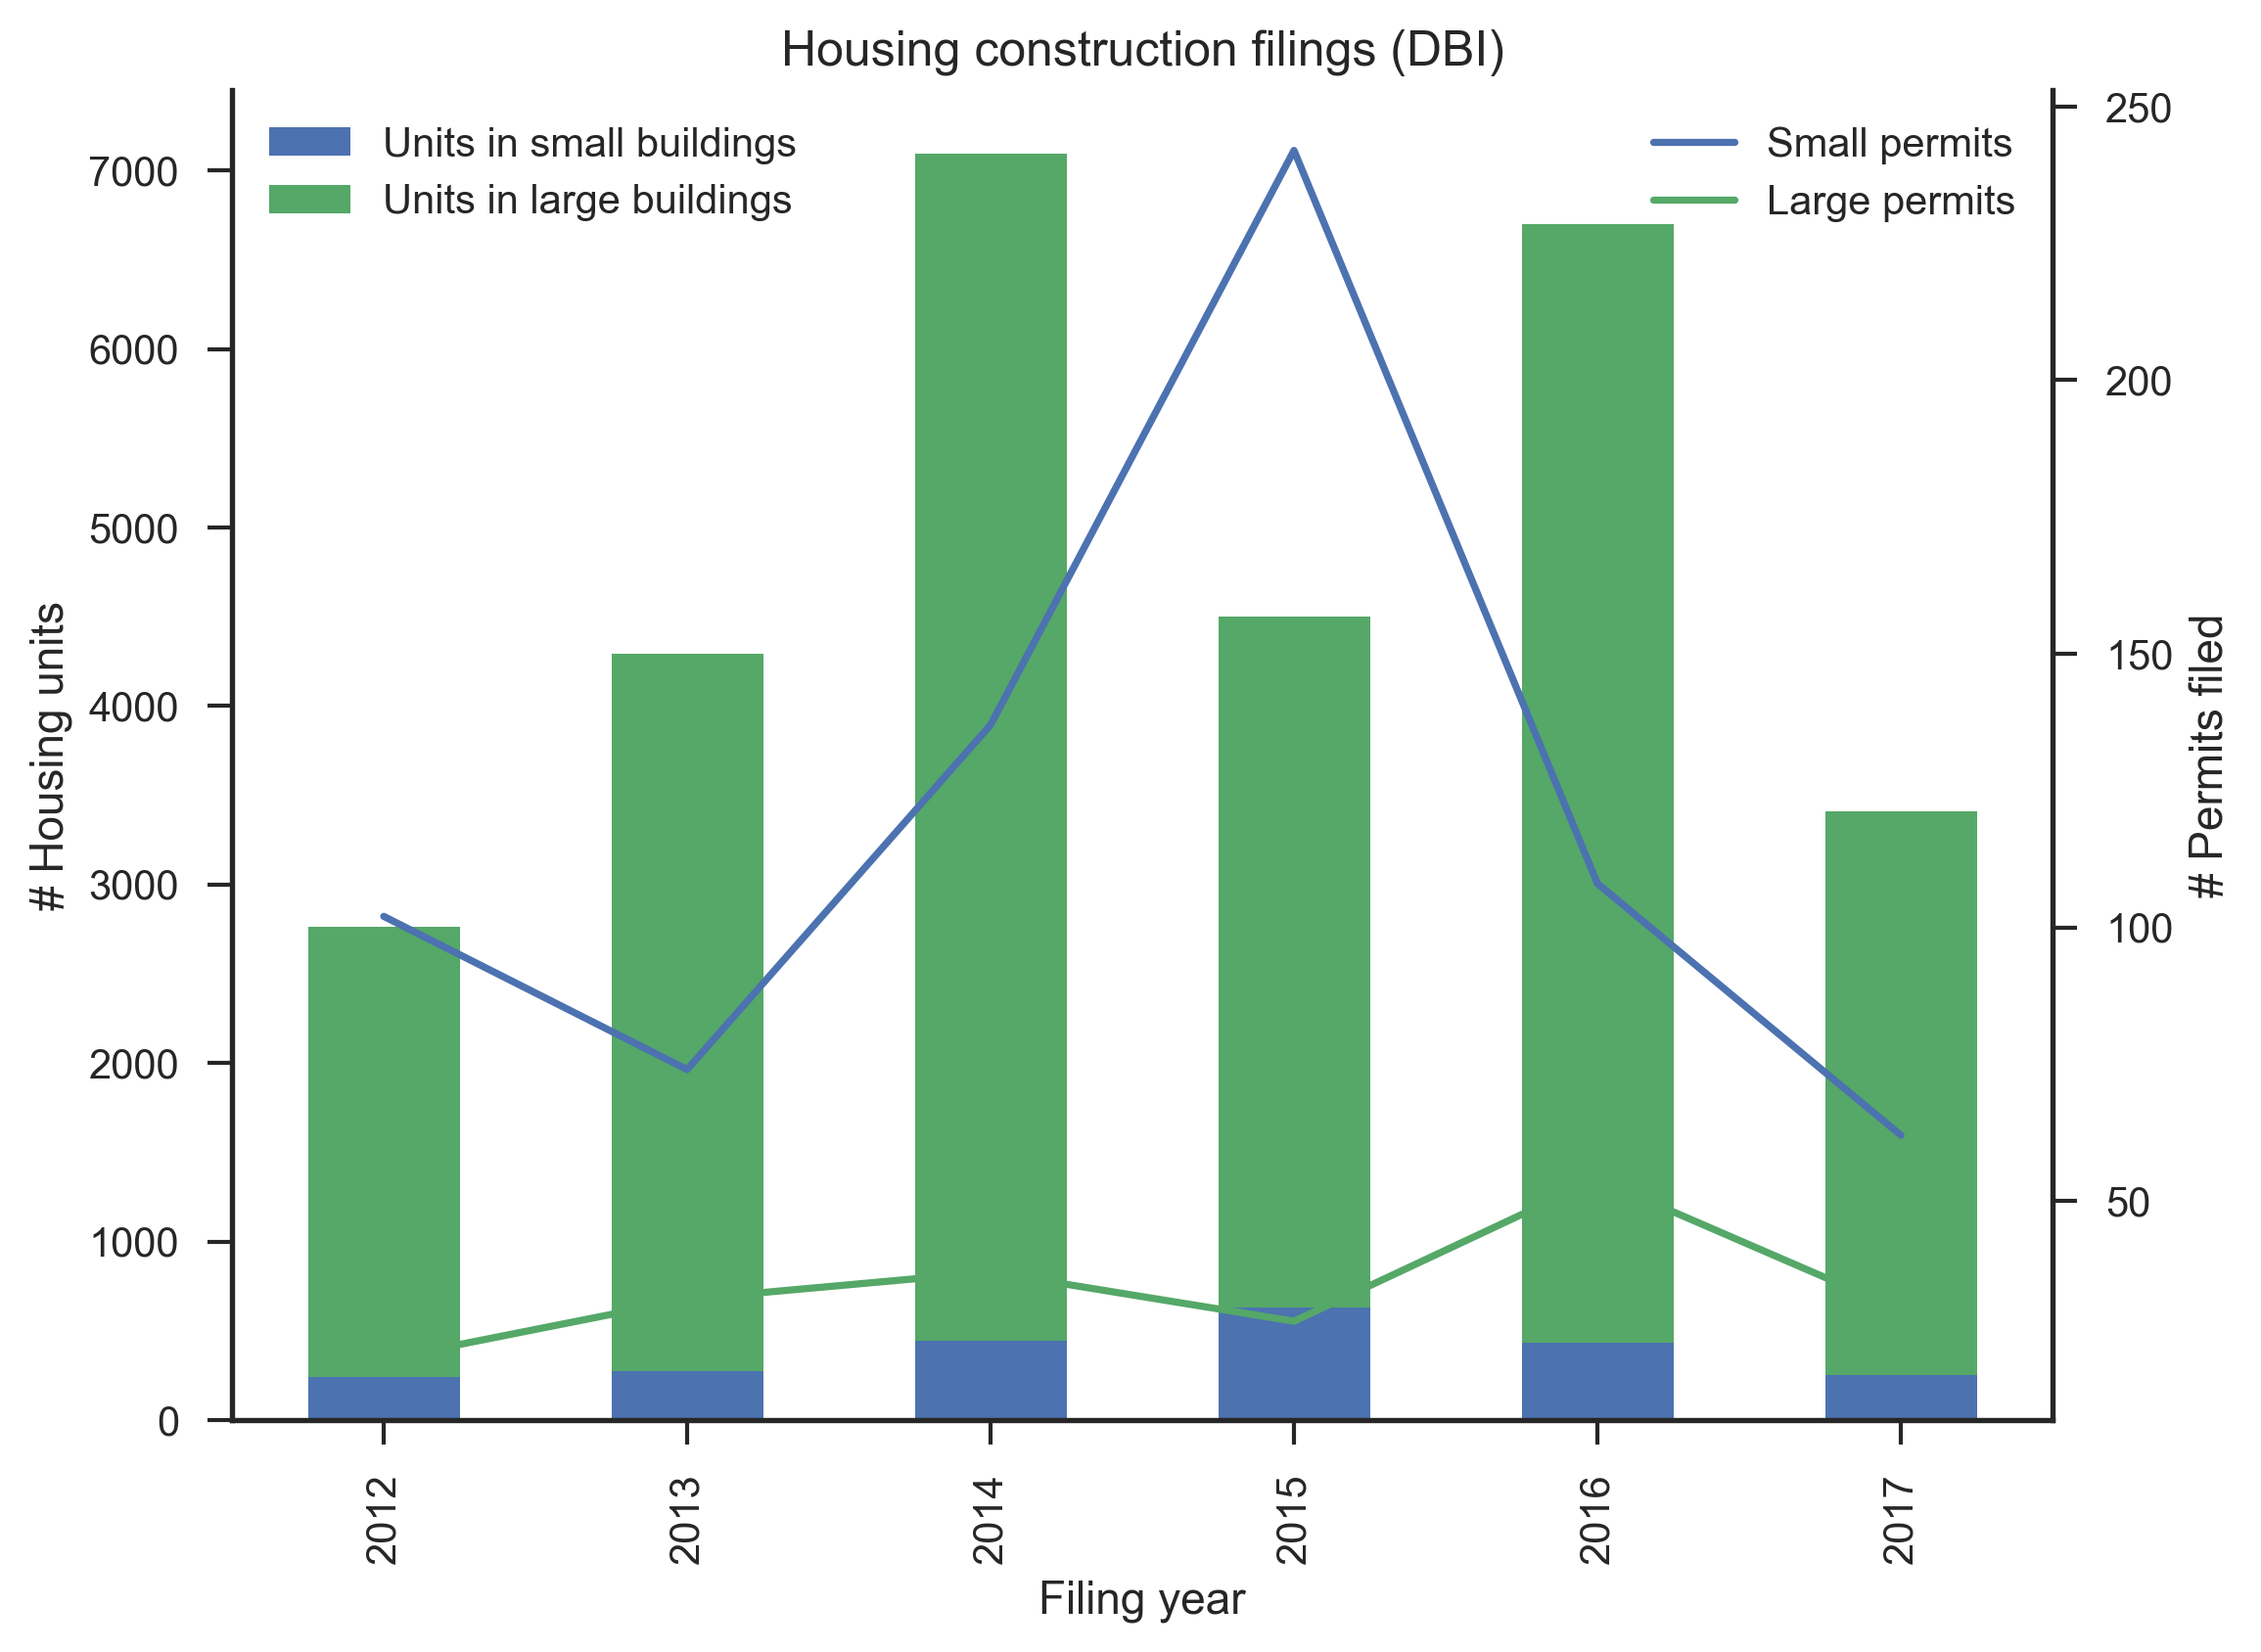

In [482]:
dbi_agg = plot(post_2000_residential, "Housing construction filings (DBI)", 2011, 2018, groupby="_year")
sns.despine(top=True, right=False)
plt.gcf().savefig("figs/housing-applications-dbi.png", dpi=300, bbox_inches='tight')

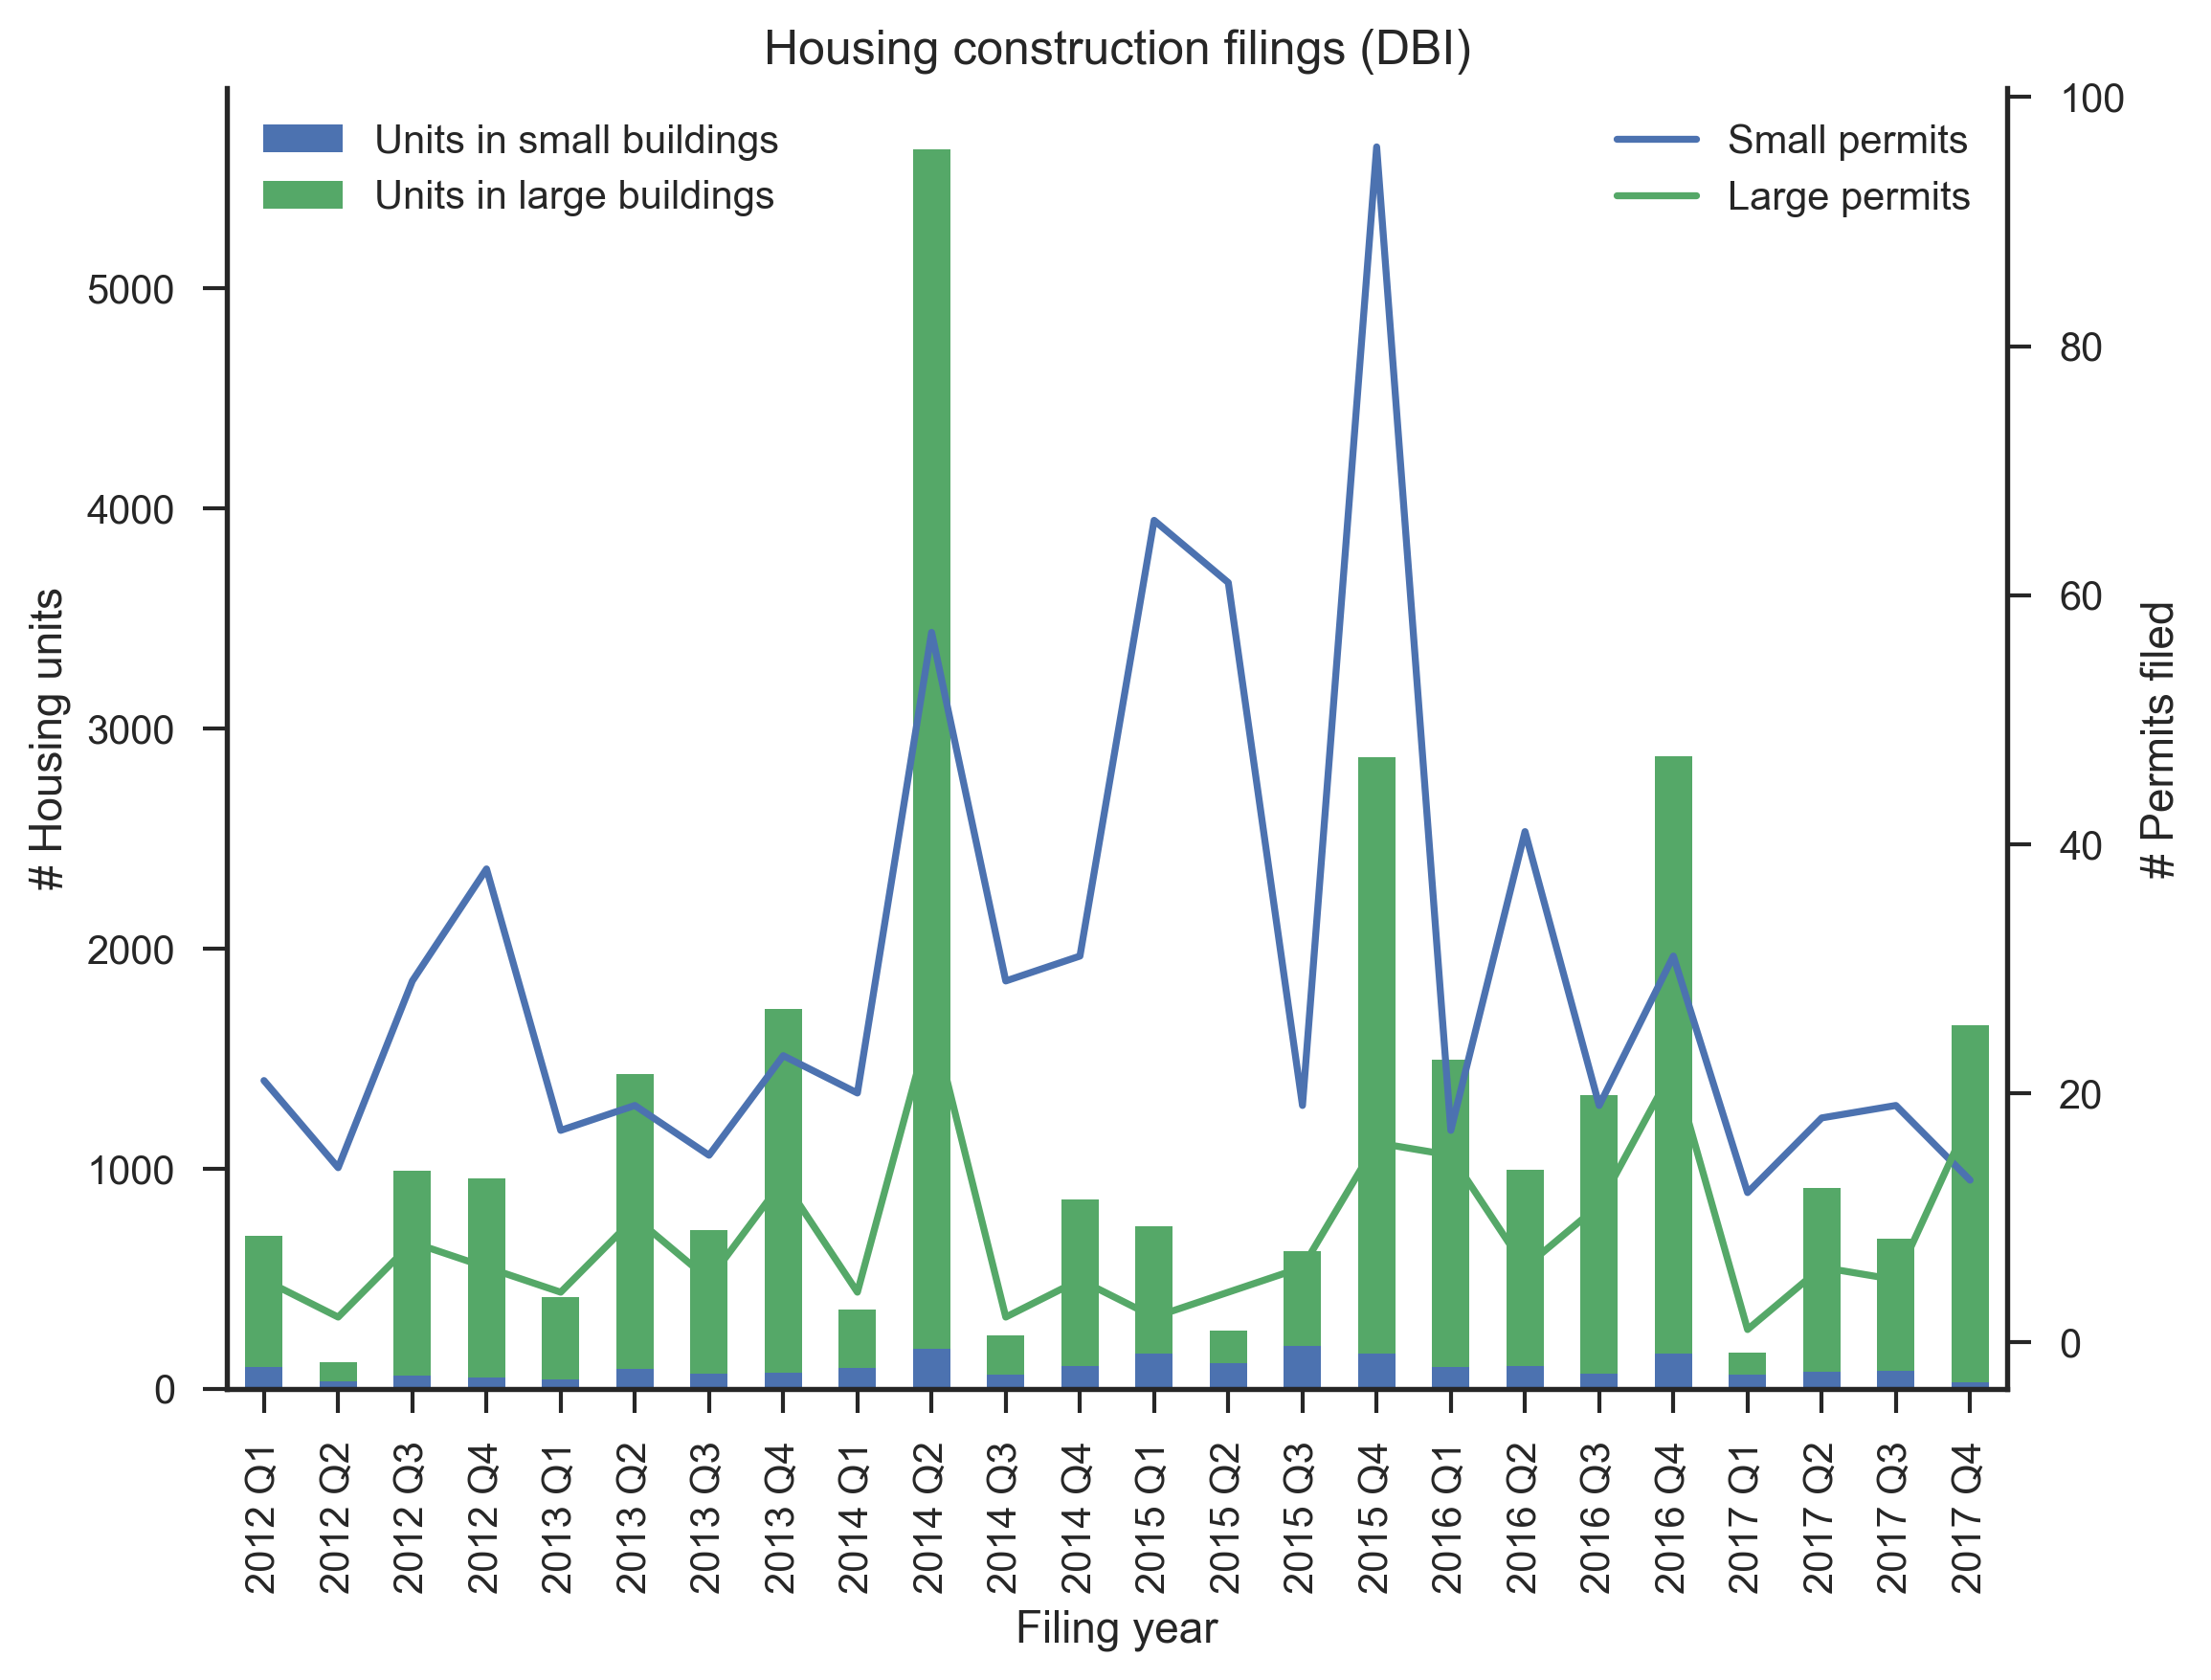

In [481]:
dbi_agg = plot(post_2000_residential, "Housing construction filings (DBI)", 2011, 2018, groupby="_quarter")
sns.despine(top=True, right=False)
plt.gcf().savefig("figs/housing-applications-dbi-quarters.png", dpi=300, bbox_inches='tight')

# PPA

In [4]:
combined

,Unnamed: 0,Affordable units,Best Date,Best Status,Blocklot,Entitled,Location,Project Type,Units
0,0,NaN,2012-06-28 00:00:00,PL FILED,6593022,False,POINT (-122.4269532 37.746568),NaN,2.0
1,1,NaN,2012-06-28 00:00:00,PL FILED,4172006,False,POINT (-122.3884388 37.7573928),NaN,1.0
2,2,NaN,2012-06-27 00:00:00,PL FILED,0818002,False,POINT (-122.4247466 37.7760868),NaN,19.0
3,3,NaN,2012-06-25 00:00:00,BP FILED,2700012,False,POINT (-122.440055 37.759228),NaN,2.0
4,4,NaN,2012-06-20 00:00:00,BP FILED,3705039,False,POINT (-122.4071854 37.7834608),NaN,116.0
5,5,NaN,2012-06-20 00:00:00,BP FILED,5518023,False,POINT (-122.418489 37.746472),NaN,2.0
6,6,NaN,2012-06-20 00:00:00,BP FILED,2393040,False,POINT (-122.490455 37.742153),NaN,16.0
7,7,NaN,2012-06-19 00:00:00,PL FILED,0634006,False,POINT (-122.4360905 37.7886224),NaN,4.0
8,8,NaN,2012-06-15 00:00:00,BP FILED,1150007,False,POINT (-122.4435763 37.7784642),NaN,3.0
9,9,NaN,NaT,PL APPROVED,7106058,True,POINT (-122.459183 37.713377),NaN,2.0


In [14]:
blklots = [
    '5284A008',
    '5287002',
    '3642042',
    '0300003C',
    '1450008',
    '3552012',
    '0837011',
    '0809001',
    '0300010',
    '0836008',
    '0836009',
    '0836013',
    '0306003',
    '6954039',
    '3642O11A',
    '3642015',
    '3721015A',
    '3721016',
    '3721031',
    '3725078',
    '0849019',
]

In [41]:
combined[(combined['Blocklot'].isin(blklots)) & (combined['Best Status'] == "PL FILED")].sort_values('Blocklot')

,Unnamed: 0,Affordable units,Best Date,Best Status,Blocklot,Entitled,Location,Project Type,Units
19299,862,NaN,2017-03-29,PL FILED,0306003,NaN,POINT (-122.410453605 37.7875399404),Visitor,0.0
21281,1402,NaN,2017-03-29,PL FILED,0306003,False,POINT (-122.4104537964 37.7875404358),Visitor,NaN
22879,1515,NaN,2017-03-29,PL FILED,0306003,False,POINT (-122.4104537964 37.7875404358),Visitor,NaN
21660,296,NaN,NaT,PL FILED,0809001,False,POINT (-122.4217910767 37.7778282166),Resident,9.0
20180,301,NaN,NaT,PL FILED,0809001,False,POINT (-122.4217910767 37.7778282166),Resident,9.0
16525,876,NaN,2013-06-07,PL FILED,0849019,NaN,POINT (-122.43003232 37.7723870746),Mixres,9.0
702,702,NaN,2007-04-18,PL FILED,1450008,False,POINT (-122.477372 37.780557),NaN,39.0
18899,462,NaN,2017-03-09,PL FILED,3552012,NaN,POINT (-122.415898802 37.7655523692),Mixres,143.0
21440,76,143.0,2017-03-09,PL FILED,3552012,False,POINT (-122.4159011841 37.7655525208),Mixres,143.0
19955,76,143.0,2017-03-09,PL FILED,3552012,False,POINT (-122.4159011841 37.7655525208),Mixres,143.0
